In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import models
import os
from tensorflow.keras.preprocessing.image import *
from skimage import io
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications import DenseNet121

2024-04-22 18:28:39.479594: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 18:28:39.535443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 18:28:46.700522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = os.path.expanduser("/mnt/d/BDA602/FruitsVegetables")

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

Found 3115 files belonging to 36 classes.


2024-04-22 18:29:09.854145: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 18:29:09.879339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 18:29:09.879385: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 18:29:09.881726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 18:29:09.881780: I external/local_xla/xla/stream_executor

Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [3]:
x_train, y_train = next(iter(train))
x_validation, y_validation = next(iter(validation))
x_test, y_test = next(iter(test))

x_train = tf.cast(x_train, 'float32') / 255.0
x_validation = tf.cast(x_validation, 'float32') / 255.0
x_test = tf.cast(x_test, 'float32') / 255.0

y_train_one_hot = to_categorical(y_train, 36)
y_validation_one_hot = to_categorical(y_validation, 36)
y_test_one_hot = to_categorical(y_test, 36)

2024-04-22 18:29:12.943414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:13.103957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:13.636176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:14.334636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:15.601024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:16.299594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:16.683010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:17.003965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 18:29:17.385721: W tensorflow/core/lib/png/png_io.cc:89] PNG 

In [4]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

In [5]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(36, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 13,464,804 (51.36 MB)

 Trainable params: 6,427,300 (24.52 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [6]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   vertical_flip=True,
                   horizontal_flip=True,
                   zoom_range = 0.3,
                   shear_range = 0.3)
validation_datagen = ImageDataGenerator(rescale= 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (224, 224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

Found 3115 images belonging to 36 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size= (224, 224),
        batch_size = 36,
        color_mode= "rgb",
        class_mode= "categorical")

Found 351 images belonging to 36 classes.


In [29]:
filepath = '/mnt/d/BDA602/DenseNet121.keras'

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=300,  restore_best_weights=True)

In [30]:
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [31]:
hist = model.fit(
        x = train_generator,
        steps_per_epoch = 20,
        epochs=500,
        validation_data = validation_generator,
        validation_steps = 10,
        callbacks=[es, checkpoint])


Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.7301 - loss: 0.8333
Epoch 1: val_accuracy improved from -inf to 0.80627, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7297 - loss: 0.8335 - val_accuracy: 0.8063 - val_loss: 0.6120
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.7364 - loss: 0.7119
Epoch 2: val_accuracy did not improve from 0.80627
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 857ms/step - accuracy: 0.7365 - loss: 0.7126 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/500


2024-04-22 20:13:57.191164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:13:57.191556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.7342 - loss: 0.7355
Epoch 3: val_accuracy improved from 0.80627 to 0.81481, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7345 - loss: 0.7375 - val_accuracy: 0.8148 - val_loss: 0.5994
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7239 - loss: 0.8117
Epoch 4: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 689ms/step - accuracy: 0.7244 - loss: 0.8129 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/500


2024-04-22 20:14:38.001616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:14:38.001660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:14:38.001671: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:14:38.001679: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.7427 - loss: 0.7352

2024-04-22 20:14:46.169159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:14:46.169599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 5: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 836ms/step - accuracy: 0.7394 - loss: 0.7433 - val_accuracy: 0.8034 - val_loss: 0.6658
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.7050 - loss: 0.9515
Epoch 6: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 794ms/step - accuracy: 0.7050 - loss: 0.9503 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/500


2024-04-22 20:15:16.442850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:15:16.442891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:15:16.442903: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:15:16.442911: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.7128 - loss: 0.7789
Epoch 7: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7128 - loss: 0.7805 - val_accuracy: 0.7721 - val_loss: 0.6787
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.6954 - loss: 0.8793
Epoch 8: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 755ms/step - accuracy: 0.6961 - loss: 0.8759 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/500


2024-04-22 20:15:55.915960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:15:55.916003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:15:55.916015: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:15:55.916021: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.7211 - loss: 0.7801
Epoch 9: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7206 - loss: 0.7815 - val_accuracy: 0.8148 - val_loss: 0.5919
Epoch 10/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.7018 - loss: 0.8526
Epoch 10: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.7006 - loss: 0.8571 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/500


2024-04-22 20:16:27.797418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:16:27.798057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:16:27.812432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:16:27.812478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:16:27.812493: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:16:27.812501: I tensorflow/core/framework/local_ren

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.7184 - loss: 0.8471
Epoch 11: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7181 - loss: 0.8517 - val_accuracy: 0.7977 - val_loss: 0.6437
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.6552 - loss: 1.0736
Epoch 12: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 819ms/step - accuracy: 0.6562 - loss: 1.0699 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/500


2024-04-22 20:17:15.215603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:17:15.215670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:17:15.215687: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:17:15.215695: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.6757 - loss: 0.9517
Epoch 13: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6758 - loss: 0.9511 - val_accuracy: 0.8034 - val_loss: 0.6616
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.7272 - loss: 0.8075
Epoch 14: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - accuracy: 0.7266 - loss: 0.8089 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/500


2024-04-22 20:17:51.377647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:17:51.377761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step - accuracy: 0.7015 - loss: 0.8898

2024-04-22 20:18:00.600794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:18:00.601316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 15: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 884ms/step - accuracy: 0.7020 - loss: 0.8883 - val_accuracy: 0.8006 - val_loss: 0.6405
Epoch 16/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.7069 - loss: 0.8087
Epoch 16: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 798ms/step - accuracy: 0.7074 - loss: 0.8093 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/500


2024-04-22 20:18:31.655778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:18:31.656206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.6848 - loss: 0.8669
Epoch 17: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6860 - loss: 0.8633 - val_accuracy: 0.8034 - val_loss: 0.6035
Epoch 18/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.6872 - loss: 0.8631
Epoch 18: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 776ms/step - accuracy: 0.6873 - loss: 0.8667 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/500


2024-04-22 20:19:10.507851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:19:10.508184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7469 - loss: 0.7460
Epoch 19: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7459 - loss: 0.7484 - val_accuracy: 0.8063 - val_loss: 0.6339
Epoch 20/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.7318 - loss: 0.8497
Epoch 20: val_accuracy did not improve from 0.81481
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.7314 - loss: 0.8400 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/500


2024-04-22 20:19:41.338950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:19:41.339072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:19:41.352716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:19:41.352774: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:19:41.352799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.7181 - loss: 0.7992
Epoch 21: val_accuracy improved from 0.81481 to 0.81766, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7181 - loss: 0.7987 - val_accuracy: 0.8177 - val_loss: 0.5583
Epoch 22/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.7415 - loss: 0.6957
Epoch 22: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 749ms/step - accuracy: 0.7411 - loss: 0.6978 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/500


2024-04-22 20:20:26.458427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:20:26.458639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.7506 - loss: 0.7244
Epoch 23: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7505 - loss: 0.7257 - val_accuracy: 0.8063 - val_loss: 0.5925
Epoch 24/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7569 - loss: 0.7367
Epoch 24: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 690ms/step - accuracy: 0.7563 - loss: 0.7372 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/500


2024-04-22 20:21:04.473870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:21:04.473915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - accuracy: 0.7266 - loss: 0.8241

2024-04-22 20:21:15.161886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:21:15.162573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 25: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 0.7255 - loss: 0.8282 - val_accuracy: 0.7835 - val_loss: 0.6250
Epoch 26/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7502 - loss: 0.7333
Epoch 26: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 820ms/step - accuracy: 0.7496 - loss: 0.7352 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/500


2024-04-22 20:21:45.618133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:21:45.618383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.6777 - loss: 0.9343
Epoch 27: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6781 - loss: 0.9330 - val_accuracy: 0.7920 - val_loss: 0.6281
Epoch 28/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.7133 - loss: 0.9293
Epoch 28: val_accuracy did not improve from 0.81766
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 676ms/step - accuracy: 0.7145 - loss: 0.9239 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/500


2024-04-22 20:22:22.438089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:22.438135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:22:22.438146: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:22:22.438153: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.7632 - loss: 0.6752
Epoch 29: val_accuracy improved from 0.81766 to 0.83191, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7622 - loss: 0.6785 - val_accuracy: 0.8319 - val_loss: 0.5585
Epoch 30/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7306 - loss: 0.7465
Epoch 30: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.7315 - loss: 0.7491 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/500


2024-04-22 20:22:53.012296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:53.012850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:22:53.026491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:53.026535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7140 - loss: 0.8042
Epoch 31: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7133 - loss: 0.8056 - val_accuracy: 0.8034 - val_loss: 0.6085
Epoch 32/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.6873 - loss: 0.9230
Epoch 32: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 813ms/step - accuracy: 0.6878 - loss: 0.9222 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/500


2024-04-22 20:23:37.992255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:23:37.992305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:23:37.992316: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:23:37.992326: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.6985 - loss: 0.9450
Epoch 33: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7003 - loss: 0.9391 - val_accuracy: 0.8319 - val_loss: 0.5587
Epoch 34/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.7638 - loss: 0.6797
Epoch 34: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 697ms/step - accuracy: 0.7633 - loss: 0.6824 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/500


2024-04-22 20:24:16.805500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:24:16.805716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step - accuracy: 0.7362 - loss: 0.8382

2024-04-22 20:24:26.134334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:24:26.134834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 35: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 896ms/step - accuracy: 0.7362 - loss: 0.8364 - val_accuracy: 0.8234 - val_loss: 0.5864
Epoch 36/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7195 - loss: 0.7655
Epoch 36: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 751ms/step - accuracy: 0.7198 - loss: 0.7673 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/500


2024-04-22 20:24:56.434136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:24:56.434527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.7428 - loss: 0.7822
Epoch 37: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7425 - loss: 0.7841 - val_accuracy: 0.8319 - val_loss: 0.5809
Epoch 38/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.7038 - loss: 0.7589
Epoch 38: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 866ms/step - accuracy: 0.7039 - loss: 0.7600 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/500


2024-04-22 20:25:37.262687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:25:37.262730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:25:37.262741: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:25:37.262750: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7295 - loss: 0.7514
Epoch 39: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7296 - loss: 0.7525 - val_accuracy: 0.8262 - val_loss: 0.6098
Epoch 40/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.7472 - loss: 0.7316
Epoch 40: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.7455 - loss: 0.7318 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/500


2024-04-22 20:26:15.779053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:26:15.779785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:26:15.793607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:26:15.793709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - accuracy: 0.7925 - loss: 0.6260
Epoch 41: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7915 - loss: 0.6273 - val_accuracy: 0.8120 - val_loss: 0.5917
Epoch 42/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.6964 - loss: 0.8716
Epoch 42: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 891ms/step - accuracy: 0.6970 - loss: 0.8694 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/500


2024-04-22 20:27:07.286323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:27:07.286369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6799 - loss: 0.8323
Epoch 43: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6816 - loss: 0.8332 - val_accuracy: 0.8006 - val_loss: 0.6769
Epoch 44/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.7373 - loss: 0.8125
Epoch 44: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 698ms/step - accuracy: 0.7379 - loss: 0.8110 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/500


2024-04-22 20:27:46.494481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:27:46.494751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 0.7252 - loss: 0.8086

2024-04-22 20:27:56.895060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:27:56.895763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 45: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.7254 - loss: 0.8079 - val_accuracy: 0.7863 - val_loss: 0.6758
Epoch 46/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.7764 - loss: 0.6754
Epoch 46: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 725ms/step - accuracy: 0.7749 - loss: 0.6791 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/500


2024-04-22 20:28:26.477496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:28:26.477554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.7297 - loss: 0.7338
Epoch 47: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7289 - loss: 0.7352 - val_accuracy: 0.7949 - val_loss: 0.6531
Epoch 48/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.7294 - loss: 0.7620
Epoch 48: val_accuracy did not improve from 0.83191
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 785ms/step - accuracy: 0.7294 - loss: 0.7617 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/500


2024-04-22 20:29:06.684824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:29:06.685101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.7285 - loss: 0.9190
Epoch 49: val_accuracy improved from 0.83191 to 0.84330, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7286 - loss: 0.9142 - val_accuracy: 0.8433 - val_loss: 0.5455
Epoch 50/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.7713 - loss: 0.7164
Epoch 50: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.7697 - loss: 0.7171 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/500


2024-04-22 20:29:40.931429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:29:40.932039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:29:40.946815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:29:40.946881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.7539 - loss: 0.7181
Epoch 51: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7535 - loss: 0.7194 - val_accuracy: 0.7721 - val_loss: 0.6627
Epoch 52/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.7489 - loss: 0.7315
Epoch 52: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.7491 - loss: 0.7301 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/500


2024-04-22 20:30:27.850902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:30:27.851178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7332 - loss: 0.8176
Epoch 53: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7329 - loss: 0.8178 - val_accuracy: 0.8177 - val_loss: 0.6202
Epoch 54/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.7221 - loss: 0.8042
Epoch 54: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 632ms/step - accuracy: 0.7222 - loss: 0.8035 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/500


2024-04-22 20:31:04.756320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:31:04.756554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.7956 - loss: 0.6860

2024-04-22 20:31:14.651149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:31:14.651585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 55: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 891ms/step - accuracy: 0.7952 - loss: 0.6869 - val_accuracy: 0.8120 - val_loss: 0.6516
Epoch 56/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.6961 - loss: 0.8396
Epoch 56: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 787ms/step - accuracy: 0.6966 - loss: 0.8395 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/500


2024-04-22 20:31:45.115660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:31:45.115898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.7457 - loss: 0.7665
Epoch 57: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7457 - loss: 0.7662 - val_accuracy: 0.8148 - val_loss: 0.6132
Epoch 58/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.7765 - loss: 0.7139
Epoch 58: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 727ms/step - accuracy: 0.7754 - loss: 0.7140 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/500


2024-04-22 20:32:23.822740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:32:23.822965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.8039 - loss: 0.6293
Epoch 59: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8027 - loss: 0.6323 - val_accuracy: 0.7436 - val_loss: 0.7993
Epoch 60/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.6917 - loss: 0.8846
Epoch 60: val_accuracy did not improve from 0.84330
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - accuracy: 0.6940 - loss: 0.8792 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/500


2024-04-22 20:32:53.683003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:32:53.683451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:32:53.699184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:32:53.699243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.7429 - loss: 0.7247
Epoch 61: val_accuracy improved from 0.84330 to 0.85470, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7427 - loss: 0.7264 - val_accuracy: 0.8547 - val_loss: 0.5505
Epoch 62/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.7542 - loss: 0.7033
Epoch 62: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 730ms/step - accuracy: 0.7536 - loss: 0.7064 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/500


2024-04-22 20:33:40.236549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:33:40.236607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.7130 - loss: 0.8183
Epoch 63: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7127 - loss: 0.8176 - val_accuracy: 0.8291 - val_loss: 0.5953
Epoch 64/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.7512 - loss: 0.6946
Epoch 64: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 661ms/step - accuracy: 0.7498 - loss: 0.6983 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/500


2024-04-22 20:34:18.013586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:34:18.013805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.7459 - loss: 0.7434

2024-04-22 20:34:27.547986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:34:27.548621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 65: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - accuracy: 0.7442 - loss: 0.7491 - val_accuracy: 0.7949 - val_loss: 0.6948
Epoch 66/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.6876 - loss: 0.8636
Epoch 66: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 775ms/step - accuracy: 0.6895 - loss: 0.8578 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/500


2024-04-22 20:34:57.430082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:34:57.430371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.7339 - loss: 0.8057
Epoch 67: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7341 - loss: 0.8041 - val_accuracy: 0.8177 - val_loss: 0.5975
Epoch 68/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.7339 - loss: 0.7564
Epoch 68: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 725ms/step - accuracy: 0.7352 - loss: 0.7521 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/500


2024-04-22 20:35:35.512469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:35:35.512512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:35:35.512526: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:35:35.512533: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.7235 - loss: 0.7636
Epoch 69: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7226 - loss: 0.7658 - val_accuracy: 0.8177 - val_loss: 0.6047
Epoch 70/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7125 - loss: 0.7598
Epoch 70: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.7140 - loss: 0.7597 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/500


2024-04-22 20:36:08.811202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:36:08.811685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:36:08.827161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:36:08.827209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.7088 - loss: 0.7613
Epoch 71: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7092 - loss: 0.7604 - val_accuracy: 0.8091 - val_loss: 0.6519
Epoch 72/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.7237 - loss: 0.8283
Epoch 72: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 791ms/step - accuracy: 0.7249 - loss: 0.8244 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/500


2024-04-22 20:36:55.327566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:36:55.328004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.7531 - loss: 0.7651
Epoch 73: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7528 - loss: 0.7654 - val_accuracy: 0.8462 - val_loss: 0.5754
Epoch 74/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.7122 - loss: 0.7620
Epoch 74: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 727ms/step - accuracy: 0.7130 - loss: 0.7612 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/500


2024-04-22 20:37:33.463486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:37:33.463776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.7678 - loss: 0.6402

2024-04-22 20:37:41.985304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:37:41.985959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 75: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 853ms/step - accuracy: 0.7675 - loss: 0.6456 - val_accuracy: 0.8291 - val_loss: 0.5788
Epoch 76/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.7778 - loss: 0.5998
Epoch 76: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 771ms/step - accuracy: 0.7773 - loss: 0.6026 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/500


2024-04-22 20:38:11.957572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:38:11.957843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.7318 - loss: 0.7950
Epoch 77: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7331 - loss: 0.7908 - val_accuracy: 0.8291 - val_loss: 0.5803
Epoch 78/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7733 - loss: 0.6659
Epoch 78: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 853ms/step - accuracy: 0.7735 - loss: 0.6656 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/500


2024-04-22 20:38:54.101678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:38:54.101940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.7273 - loss: 0.7666
Epoch 79: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7275 - loss: 0.7643 - val_accuracy: 0.8234 - val_loss: 0.5595
Epoch 80/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.7628 - loss: 0.6143
Epoch 80: val_accuracy did not improve from 0.85470
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.7630 - loss: 0.6163 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/500


2024-04-22 20:39:24.942465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:39:24.943233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:39:24.956672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:39:24.956723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.7283 - loss: 0.7676
Epoch 81: val_accuracy improved from 0.85470 to 0.87179, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7288 - loss: 0.7658 - val_accuracy: 0.8718 - val_loss: 0.4928
Epoch 82/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.7511 - loss: 0.6898
Epoch 82: val_accuracy did not improve from 0.87179
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 725ms/step - accuracy: 0.7510 - loss: 0.6907 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/500


2024-04-22 20:40:12.018419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:40:12.018459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7599 - loss: 0.6831
Epoch 83: val_accuracy did not improve from 0.87179
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7594 - loss: 0.6854 - val_accuracy: 0.8575 - val_loss: 0.5153
Epoch 84/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.6929 - loss: 0.8475
Epoch 84: val_accuracy did not improve from 0.87179
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step - accuracy: 0.6948 - loss: 0.8442 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/500


2024-04-22 20:40:54.209359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:40:54.209410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:40:54.209422: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:40:54.209428: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - accuracy: 0.7483 - loss: 0.6632

2024-04-22 20:41:05.129382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:41:05.130046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 85: val_accuracy improved from 0.87179 to 0.87464, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7496 - loss: 0.6665 - val_accuracy: 0.8746 - val_loss: 0.5215
Epoch 86/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.7490 - loss: 0.7888
Epoch 86: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 953ms/step - accuracy: 0.7486 - loss: 0.7879 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/500


2024-04-22 20:41:42.340147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:41:42.340570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.7813 - loss: 0.7086
Epoch 87: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7800 - loss: 0.7105 - val_accuracy: 0.8205 - val_loss: 0.5620
Epoch 88/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.7837 - loss: 0.6626
Epoch 88: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 888ms/step - accuracy: 0.7832 - loss: 0.6640 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/500


2024-04-22 20:42:26.307140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:42:26.307412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7861 - loss: 0.6436
Epoch 89: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7842 - loss: 0.6467 - val_accuracy: 0.8262 - val_loss: 0.5863
Epoch 90/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.7473 - loss: 0.7983
Epoch 90: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.7448 - loss: 0.7960 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/500


2024-04-22 20:43:00.177853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:43:00.178632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:43:00.192276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:43:00.192332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.7419 - loss: 0.6838
Epoch 91: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7428 - loss: 0.6836 - val_accuracy: 0.8433 - val_loss: 0.5480
Epoch 92/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.7786 - loss: 0.7112
Epoch 92: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 788ms/step - accuracy: 0.7790 - loss: 0.7101 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/500


2024-04-22 20:43:48.154969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:43:48.155014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:43:48.155026: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:43:48.155033: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.7466 - loss: 0.6489
Epoch 93: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7458 - loss: 0.6512 - val_accuracy: 0.8604 - val_loss: 0.5851
Epoch 94/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.7266 - loss: 0.7494
Epoch 94: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 725ms/step - accuracy: 0.7278 - loss: 0.7482 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/500


2024-04-22 20:44:27.789194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:44:27.789697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.7504 - loss: 0.7868

2024-04-22 20:44:38.458605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:44:38.459201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 95: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 973ms/step - accuracy: 0.7511 - loss: 0.7800 - val_accuracy: 0.8405 - val_loss: 0.5497
Epoch 96/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.7539 - loss: 0.7392
Epoch 96: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 822ms/step - accuracy: 0.7533 - loss: 0.7404 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/500


2024-04-22 20:45:09.587636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:45:09.587694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:45:09.587735: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.7474 - loss: 0.7090
Epoch 97: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7466 - loss: 0.7108 - val_accuracy: 0.8405 - val_loss: 0.5574
Epoch 98/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.7446 - loss: 0.7174
Epoch 98: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.7445 - loss: 0.7191 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/500


2024-04-22 20:45:52.008300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:45:52.008520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.7837 - loss: 0.5671
Epoch 99: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7822 - loss: 0.5717 - val_accuracy: 0.8291 - val_loss: 0.5807
Epoch 100/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.7527 - loss: 0.7118
Epoch 100: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.7549 - loss: 0.7098 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 101/500


2024-04-22 20:46:23.300322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:46:23.300937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:46:23.314307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:46:23.314375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7189 - loss: 0.7511
Epoch 101: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7196 - loss: 0.7506 - val_accuracy: 0.8604 - val_loss: 0.5066
Epoch 102/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.7414 - loss: 0.7497
Epoch 102: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 771ms/step - accuracy: 0.7413 - loss: 0.7496 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 103/500


2024-04-22 20:47:07.782047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:47:07.782103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.7917 - loss: 0.6613
Epoch 103: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7903 - loss: 0.6643 - val_accuracy: 0.8405 - val_loss: 0.5706
Epoch 104/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.7722 - loss: 0.7624
Epoch 104: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 675ms/step - accuracy: 0.7719 - loss: 0.7616 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 105/500


2024-04-22 20:47:45.574733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:47:45.575223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.7995 - loss: 0.5903

2024-04-22 20:47:55.794698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:47:55.794834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 105: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 926ms/step - accuracy: 0.7947 - loss: 0.6027 - val_accuracy: 0.8689 - val_loss: 0.5431
Epoch 106/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.7321 - loss: 0.8009
Epoch 106: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 745ms/step - accuracy: 0.7322 - loss: 0.7998 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 107/500


2024-04-22 20:48:25.272603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:48:25.272852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.7264 - loss: 0.7978
Epoch 107: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7261 - loss: 0.7979 - val_accuracy: 0.8405 - val_loss: 0.5756
Epoch 108/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.7776 - loss: 0.6419
Epoch 108: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 812ms/step - accuracy: 0.7766 - loss: 0.6431 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 109/500


2024-04-22 20:49:05.247365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:49:05.247522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.7490 - loss: 0.6096
Epoch 109: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7495 - loss: 0.6109 - val_accuracy: 0.8291 - val_loss: 0.5809
Epoch 110/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.7406 - loss: 0.7054
Epoch 110: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.7392 - loss: 0.7084 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 111/500


2024-04-22 20:49:35.108579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:49:35.109114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:49:35.122650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:49:35.122700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.7654 - loss: 0.6484
Epoch 111: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7655 - loss: 0.6492 - val_accuracy: 0.8405 - val_loss: 0.5757
Epoch 112/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.7394 - loss: 0.7550
Epoch 112: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 749ms/step - accuracy: 0.7402 - loss: 0.7530 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 113/500


2024-04-22 20:50:20.340323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:50:20.340366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:50:20.340378: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:50:20.340387: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.7258 - loss: 0.7257
Epoch 113: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7268 - loss: 0.7244 - val_accuracy: 0.8291 - val_loss: 0.5480
Epoch 114/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.7021 - loss: 0.7387
Epoch 114: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 670ms/step - accuracy: 0.7039 - loss: 0.7356 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 115/500


2024-04-22 20:50:58.443137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:50:58.443589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 0.7828 - loss: 0.7755

2024-04-22 20:51:07.540404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:51:07.541106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 115: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 870ms/step - accuracy: 0.7789 - loss: 0.7771 - val_accuracy: 0.8348 - val_loss: 0.5752
Epoch 116/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.7389 - loss: 0.6904
Epoch 116: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 795ms/step - accuracy: 0.7391 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 117/500


2024-04-22 20:51:38.346107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:51:38.346551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.7256 - loss: 0.7022
Epoch 117: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7255 - loss: 0.7032 - val_accuracy: 0.8433 - val_loss: 0.5360
Epoch 118/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.7379 - loss: 0.7067
Epoch 118: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 813ms/step - accuracy: 0.7380 - loss: 0.7060 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 119/500


2024-04-22 20:52:18.677074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:52:18.677309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.7707 - loss: 0.6875
Epoch 119: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7709 - loss: 0.6868 - val_accuracy: 0.8348 - val_loss: 0.5457
Epoch 120/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.7357 - loss: 0.7914
Epoch 120: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.7363 - loss: 0.7845 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 121/500


2024-04-22 20:52:48.858395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:52:48.858537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:52:48.872072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:52:48.872119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:52:48.872131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:52:48.872138: I tensorflow/core/framework/local_ren

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.7491 - loss: 0.7253
Epoch 121: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7491 - loss: 0.7261 - val_accuracy: 0.8519 - val_loss: 0.5558
Epoch 122/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.7636 - loss: 0.6356
Epoch 122: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 716ms/step - accuracy: 0.7630 - loss: 0.6376 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 123/500


2024-04-22 20:53:34.635266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:53:34.635307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:53:34.635319: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:53:34.635325: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.7722 - loss: 0.7134
Epoch 123: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7713 - loss: 0.7140 - val_accuracy: 0.8319 - val_loss: 0.5658
Epoch 124/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.7492 - loss: 0.7250
Epoch 124: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 685ms/step - accuracy: 0.7484 - loss: 0.7260 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 125/500


2024-04-22 20:54:11.359239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:54:11.359280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:54:11.359292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:54:11.359300: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 492ms/step - accuracy: 0.7092 - loss: 0.6905

2024-04-22 20:54:19.998374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:54:19.998878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 125: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 868ms/step - accuracy: 0.7125 - loss: 0.6900 - val_accuracy: 0.8490 - val_loss: 0.5623
Epoch 126/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.7869 - loss: 0.6067
Epoch 126: val_accuracy did not improve from 0.87464
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 724ms/step - accuracy: 0.7863 - loss: 0.6084 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 127/500


2024-04-22 20:54:48.948181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:54:48.948416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.7675 - loss: 0.6683
Epoch 127: val_accuracy improved from 0.87464 to 0.88034, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7683 - loss: 0.6657 - val_accuracy: 0.8803 - val_loss: 0.4895
Epoch 128/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.7990 - loss: 0.6546
Epoch 128: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 769ms/step - accuracy: 0.7982 - loss: 0.6548 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 129/500


2024-04-22 20:55:31.783063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:55:31.783107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 20:55:31.783118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 20:55:31.783125: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7680 - loss: 0.6734
Epoch 129: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7680 - loss: 0.6722 - val_accuracy: 0.8547 - val_loss: 0.5523
Epoch 130/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.7769 - loss: 0.7845
Epoch 130: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.7744 - loss: 0.7744 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 131/500


2024-04-22 20:56:08.001207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:56:08.001893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:56:08.017312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:56:08.017429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7616 - loss: 0.7099  
Epoch 131: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7617 - loss: 0.7116 - val_accuracy: 0.8689 - val_loss: 0.5219
Epoch 132/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.7400 - loss: 0.7303
Epoch 132: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 869ms/step - accuracy: 0.7407 - loss: 0.7294 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 133/500


2024-04-22 20:57:01.278036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:57:01.278276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.7638 - loss: 0.6687
Epoch 133: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7639 - loss: 0.6689 - val_accuracy: 0.8348 - val_loss: 0.5944
Epoch 134/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.7588 - loss: 0.6805
Epoch 134: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.7583 - loss: 0.6808 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 135/500


2024-04-22 20:57:42.114673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:57:42.114943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7646 - loss: 0.6741

2024-04-22 20:57:50.235096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:57:50.235424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 135: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 829ms/step - accuracy: 0.7627 - loss: 0.6728 - val_accuracy: 0.8718 - val_loss: 0.5347
Epoch 136/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.8070 - loss: 0.6039
Epoch 136: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 894ms/step - accuracy: 0.8067 - loss: 0.6047 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 137/500


2024-04-22 20:58:22.911351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:58:22.911615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.7574 - loss: 0.6798
Epoch 137: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7580 - loss: 0.6781 - val_accuracy: 0.8405 - val_loss: 0.6012
Epoch 138/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.7643 - loss: 0.6677
Epoch 138: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.7631 - loss: 0.6705 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 139/500


2024-04-22 20:59:03.470156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:59:03.470519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.8023 - loss: 0.5826
Epoch 139: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8016 - loss: 0.5863 - val_accuracy: 0.8604 - val_loss: 0.5464
Epoch 140/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7704 - loss: 0.6437
Epoch 140: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.7706 - loss: 0.6430 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 141/500


2024-04-22 20:59:34.578847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:59:34.579176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 20:59:34.593062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:59:34.593127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.7728 - loss: 0.5923
Epoch 141: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7727 - loss: 0.5936 - val_accuracy: 0.8575 - val_loss: 0.5412
Epoch 142/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.7465 - loss: 0.6453
Epoch 142: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 793ms/step - accuracy: 0.7468 - loss: 0.6465 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 143/500


2024-04-22 21:00:21.262410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:00:21.262661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.8014 - loss: 0.6333
Epoch 143: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8011 - loss: 0.6334 - val_accuracy: 0.8262 - val_loss: 0.5977
Epoch 144/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.7733 - loss: 0.5766
Epoch 144: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step - accuracy: 0.7736 - loss: 0.5784 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 145/500


2024-04-22 21:01:00.687561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:01:00.687603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:01:00.687614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:01:00.687621: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.7607 - loss: 0.7003

2024-04-22 21:01:09.671962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:01:09.672617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 145: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 877ms/step - accuracy: 0.7596 - loss: 0.7005 - val_accuracy: 0.8433 - val_loss: 0.5813
Epoch 146/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.8091 - loss: 0.5484
Epoch 146: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 819ms/step - accuracy: 0.8072 - loss: 0.5516 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 147/500


2024-04-22 21:01:40.430665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:01:40.430929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.7871 - loss: 0.6106
Epoch 147: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7863 - loss: 0.6137 - val_accuracy: 0.8319 - val_loss: 0.6429
Epoch 148/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7585 - loss: 0.7781
Epoch 148: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 717ms/step - accuracy: 0.7577 - loss: 0.7778 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 149/500


2024-04-22 21:02:18.447676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:02:18.447902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.7717 - loss: 0.6660
Epoch 149: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7725 - loss: 0.6634 - val_accuracy: 0.8462 - val_loss: 0.5508
Epoch 150/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - accuracy: 0.7247 - loss: 0.7079
Epoch 150: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.7293 - loss: 0.6984 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 151/500


2024-04-22 21:02:49.603409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:02:49.604110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:02:49.619231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:02:49.619321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7657 - loss: 0.6135
Epoch 151: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7656 - loss: 0.6137 - val_accuracy: 0.8519 - val_loss: 0.6072
Epoch 152/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.7688 - loss: 0.5994
Epoch 152: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 722ms/step - accuracy: 0.7693 - loss: 0.5992 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 153/500


2024-04-22 21:03:34.769485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:03:34.769905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.7450 - loss: 0.7229
Epoch 153: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7451 - loss: 0.7236 - val_accuracy: 0.8462 - val_loss: 0.5830
Epoch 154/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7850 - loss: 0.6712
Epoch 154: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 689ms/step - accuracy: 0.7848 - loss: 0.6714 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 155/500


2024-04-22 21:04:14.425105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:04:14.425358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 0.7784 - loss: 0.6311

2024-04-22 21:04:23.795636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:04:23.796073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 155: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 900ms/step - accuracy: 0.7784 - loss: 0.6319 - val_accuracy: 0.8462 - val_loss: 0.6073
Epoch 156/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.7699 - loss: 0.6959
Epoch 156: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 897ms/step - accuracy: 0.7697 - loss: 0.6954 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 157/500


2024-04-22 21:04:56.043598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:04:56.043857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.7674 - loss: 0.6103
Epoch 157: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7682 - loss: 0.6096 - val_accuracy: 0.8376 - val_loss: 0.6396
Epoch 158/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.8137 - loss: 0.5258
Epoch 158: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.8142 - loss: 0.5256 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 159/500


2024-04-22 21:05:36.390927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:05:36.390968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.7738 - loss: 0.7118
Epoch 159: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7739 - loss: 0.7101 - val_accuracy: 0.8405 - val_loss: 0.5983
Epoch 160/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.7971 - loss: 0.6030
Epoch 160: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.7932 - loss: 0.6146 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 161/500


2024-04-22 21:06:06.962838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:06:06.963439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:06:06.976470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:06:06.976508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.7797 - loss: 0.6495
Epoch 161: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7798 - loss: 0.6489 - val_accuracy: 0.8462 - val_loss: 0.6070
Epoch 162/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.7648 - loss: 0.6832
Epoch 162: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 794ms/step - accuracy: 0.7647 - loss: 0.6833 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 163/500


2024-04-22 21:06:51.952341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:06:51.952617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.7918 - loss: 0.6663
Epoch 163: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7917 - loss: 0.6640 - val_accuracy: 0.8490 - val_loss: 0.6264
Epoch 164/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.7482 - loss: 0.7058
Epoch 164: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.7484 - loss: 0.7051 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 165/500


2024-04-22 21:07:29.746087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:07:29.746456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.7624 - loss: 0.7175

2024-04-22 21:07:39.345465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:07:39.346123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 165: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 925ms/step - accuracy: 0.7621 - loss: 0.7114 - val_accuracy: 0.8746 - val_loss: 0.5475
Epoch 166/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.7960 - loss: 0.5645
Epoch 166: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 788ms/step - accuracy: 0.7951 - loss: 0.5672 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 167/500


2024-04-22 21:08:09.101622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:08:09.101664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.7627 - loss: 0.6588
Epoch 167: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7626 - loss: 0.6577 - val_accuracy: 0.8575 - val_loss: 0.5300
Epoch 168/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.7709 - loss: 0.6360
Epoch 168: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.7716 - loss: 0.6347 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 169/500


2024-04-22 21:08:48.299869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:08:48.299934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.7886 - loss: 0.6009
Epoch 169: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7879 - loss: 0.6037 - val_accuracy: 0.8205 - val_loss: 0.5940
Epoch 170/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.7233 - loss: 0.7545
Epoch 170: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.7276 - loss: 0.7468 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 171/500


2024-04-22 21:09:19.782928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:09:19.783485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:09:19.813334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:09:19.813570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7626 - loss: 0.6934
Epoch 171: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7630 - loss: 0.6904 - val_accuracy: 0.8376 - val_loss: 0.6055
Epoch 172/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.7739 - loss: 0.7221
Epoch 172: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step - accuracy: 0.7731 - loss: 0.7217 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 173/500


2024-04-22 21:10:05.292642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:10:05.292866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.7909 - loss: 0.6268
Epoch 173: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7910 - loss: 0.6266 - val_accuracy: 0.8519 - val_loss: 0.5573
Epoch 174/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.7745 - loss: 0.6607
Epoch 174: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 776ms/step - accuracy: 0.7745 - loss: 0.6608 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 175/500


2024-04-22 21:10:46.063618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:10:46.063968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.7788 - loss: 0.5973

2024-04-22 21:10:57.473392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:10:57.474090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 175: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7810 - loss: 0.5871 - val_accuracy: 0.8547 - val_loss: 0.5741
Epoch 176/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.7715 - loss: 0.6416
Epoch 176: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 996ms/step - accuracy: 0.7710 - loss: 0.6415 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 177/500


2024-04-22 21:11:36.591433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:11:36.591671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.8009 - loss: 0.5578
Epoch 177: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8003 - loss: 0.5600 - val_accuracy: 0.8604 - val_loss: 0.5544
Epoch 178/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.7828 - loss: 0.6164
Epoch 178: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 826ms/step - accuracy: 0.7820 - loss: 0.6189 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 179/500


2024-04-22 21:12:19.476700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:12:19.476941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.7868 - loss: 0.6745
Epoch 179: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7864 - loss: 0.6740 - val_accuracy: 0.8462 - val_loss: 0.5538
Epoch 180/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.7825 - loss: 0.6557
Epoch 180: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.7816 - loss: 0.6554 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 181/500


2024-04-22 21:12:51.658639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:12:51.659310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:12:51.672857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:12:51.672930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.7931 - loss: 0.6364
Epoch 181: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7930 - loss: 0.6363 - val_accuracy: 0.8462 - val_loss: 0.5595
Epoch 182/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.7974 - loss: 0.5964
Epoch 182: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 858ms/step - accuracy: 0.7972 - loss: 0.5954 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 183/500


2024-04-22 21:13:39.356052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:13:39.356119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8121 - loss: 0.5364
Epoch 183: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8110 - loss: 0.5414 - val_accuracy: 0.8091 - val_loss: 0.6287
Epoch 184/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.7971 - loss: 0.6419
Epoch 184: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 721ms/step - accuracy: 0.7961 - loss: 0.6422 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 185/500


2024-04-22 21:14:17.389790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:14:17.390023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.7627 - loss: 0.6858

2024-04-22 21:14:26.943333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:14:26.943727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 185: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 886ms/step - accuracy: 0.7632 - loss: 0.6853 - val_accuracy: 0.8376 - val_loss: 0.5831
Epoch 186/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.7341 - loss: 0.8071
Epoch 186: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 787ms/step - accuracy: 0.7340 - loss: 0.8077 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 187/500


2024-04-22 21:14:56.769724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:14:56.769918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.7328 - loss: 0.7624
Epoch 187: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7346 - loss: 0.7575 - val_accuracy: 0.8348 - val_loss: 0.6124
Epoch 188/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7949 - loss: 0.6256
Epoch 188: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step - accuracy: 0.7946 - loss: 0.6254 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 189/500


2024-04-22 21:15:36.788994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:15:36.789042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:15:36.789053: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:15:36.789061: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.8203 - loss: 0.5745
Epoch 189: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8194 - loss: 0.5739 - val_accuracy: 0.8405 - val_loss: 0.5551
Epoch 190/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.7599 - loss: 0.6440
Epoch 190: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.7644 - loss: 0.6347 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 191/500


2024-04-22 21:16:08.613197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:16:08.613870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:16:08.629943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:16:08.629990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.7651 - loss: 0.6897
Epoch 191: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7648 - loss: 0.6906 - val_accuracy: 0.8348 - val_loss: 0.5573
Epoch 192/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.7576 - loss: 0.7566
Epoch 192: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 763ms/step - accuracy: 0.7576 - loss: 0.7538 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 193/500


2024-04-22 21:16:53.892326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:16:53.892596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.7599 - loss: 0.7092
Epoch 193: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7610 - loss: 0.7072 - val_accuracy: 0.8604 - val_loss: 0.5420
Epoch 194/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.7855 - loss: 0.6071
Epoch 194: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 771ms/step - accuracy: 0.7864 - loss: 0.6061 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 195/500


2024-04-22 21:17:32.153753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:17:32.154129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.7753 - loss: 0.5887

2024-04-22 21:17:42.040116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:17:42.040758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 195: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 938ms/step - accuracy: 0.7765 - loss: 0.5880 - val_accuracy: 0.8519 - val_loss: 0.5386
Epoch 196/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.7667 - loss: 0.6429
Epoch 196: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 822ms/step - accuracy: 0.7668 - loss: 0.6422 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 197/500


2024-04-22 21:18:13.573512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:18:13.573944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7468 - loss: 0.6626
Epoch 197: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7472 - loss: 0.6624 - val_accuracy: 0.8462 - val_loss: 0.5365
Epoch 198/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.7892 - loss: 0.5720
Epoch 198: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 759ms/step - accuracy: 0.7889 - loss: 0.5739 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 199/500


2024-04-22 21:18:51.951406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:18:51.951450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:18:51.951463: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:18:51.951470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7862 - loss: 0.5842
Epoch 199: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7865 - loss: 0.5846 - val_accuracy: 0.8519 - val_loss: 0.5867
Epoch 200/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.7439 - loss: 0.6720
Epoch 200: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.7443 - loss: 0.6716 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 201/500


2024-04-22 21:19:23.975741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:19:23.976383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:19:23.989763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:19:23.989804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.7926 - loss: 0.5538
Epoch 201: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7922 - loss: 0.5571 - val_accuracy: 0.8348 - val_loss: 0.5776
Epoch 202/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.7621 - loss: 0.7021
Epoch 202: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 657ms/step - accuracy: 0.7631 - loss: 0.6993 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 203/500


2024-04-22 21:20:07.395900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:20:07.395943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:20:07.395954: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:20:07.395962: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.7824 - loss: 0.6175
Epoch 203: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7821 - loss: 0.6186 - val_accuracy: 0.8405 - val_loss: 0.5865
Epoch 204/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.7742 - loss: 0.6322
Epoch 204: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 623ms/step - accuracy: 0.7750 - loss: 0.6311 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 205/500


2024-04-22 21:20:44.179875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:20:44.179918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:20:44.179930: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:20:44.179937: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.7871 - loss: 0.6195

2024-04-22 21:20:53.599718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:20:53.600375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 205: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 915ms/step - accuracy: 0.7867 - loss: 0.6161 - val_accuracy: 0.8547 - val_loss: 0.5160
Epoch 206/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.7792 - loss: 0.6340
Epoch 206: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 716ms/step - accuracy: 0.7785 - loss: 0.6344 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 207/500


2024-04-22 21:21:22.091115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:21:22.091433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.7836 - loss: 0.6330
Epoch 207: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7820 - loss: 0.6370 - val_accuracy: 0.8547 - val_loss: 0.5478
Epoch 208/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.8232 - loss: 0.5753
Epoch 208: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 832ms/step - accuracy: 0.8221 - loss: 0.5787 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 209/500


2024-04-22 21:22:02.462189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:22:02.462407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.7908 - loss: 0.5530
Epoch 209: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7906 - loss: 0.5550 - val_accuracy: 0.8519 - val_loss: 0.5818
Epoch 210/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7782 - loss: 0.6909
Epoch 210: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.7807 - loss: 0.6818 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 211/500


2024-04-22 21:22:33.052796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:22:33.053501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:22:33.068742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:22:33.068797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7965 - loss: 0.6195
Epoch 211: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7959 - loss: 0.6192 - val_accuracy: 0.8604 - val_loss: 0.5347
Epoch 212/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.7575 - loss: 0.7075
Epoch 212: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 792ms/step - accuracy: 0.7580 - loss: 0.7067 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 213/500


2024-04-22 21:23:18.204478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:23:18.204517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:23:18.204530: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:23:18.204537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.8210 - loss: 0.6399
Epoch 213: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8204 - loss: 0.6389 - val_accuracy: 0.8462 - val_loss: 0.5923
Epoch 214/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.7646 - loss: 0.6825
Epoch 214: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 694ms/step - accuracy: 0.7641 - loss: 0.6842 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 215/500


2024-04-22 21:23:56.432406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:23:56.432450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:23:56.432463: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:23:56.432470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.7801 - loss: 0.5853

2024-04-22 21:24:07.265059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:24:07.265619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 215: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 979ms/step - accuracy: 0.7818 - loss: 0.5880 - val_accuracy: 0.8689 - val_loss: 0.5074
Epoch 216/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.7091 - loss: 0.7150
Epoch 216: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 830ms/step - accuracy: 0.7096 - loss: 0.7148 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 217/500


2024-04-22 21:24:39.186272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:24:39.186527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.8081 - loss: 0.5504
Epoch 217: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8072 - loss: 0.5522 - val_accuracy: 0.8689 - val_loss: 0.4868
Epoch 218/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.8084 - loss: 0.5774
Epoch 218: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 818ms/step - accuracy: 0.8092 - loss: 0.5754 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 219/500


2024-04-22 21:25:21.257001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:25:21.257058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.7730 - loss: 0.7249
Epoch 219: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7732 - loss: 0.7244 - val_accuracy: 0.8490 - val_loss: 0.5645
Epoch 220/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.7673 - loss: 0.6353
Epoch 220: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.7706 - loss: 0.6286 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 221/500


2024-04-22 21:25:51.086290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:25:51.086632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:25:51.100365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:25:51.100404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:25:51.100415: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:25:51.100422: I tensorflow/core/framework/local_ren

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.8023 - loss: 0.6046
Epoch 221: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8018 - loss: 0.6041 - val_accuracy: 0.8490 - val_loss: 0.5457
Epoch 222/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.7864 - loss: 0.6842
Epoch 222: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 920ms/step - accuracy: 0.7868 - loss: 0.6818 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 223/500


2024-04-22 21:26:46.714051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:26:46.714319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.7867 - loss: 0.5905
Epoch 223: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7868 - loss: 0.5928 - val_accuracy: 0.8519 - val_loss: 0.4822
Epoch 224/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7623 - loss: 0.6622
Epoch 224: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 804ms/step - accuracy: 0.7627 - loss: 0.6613 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 225/500


2024-04-22 21:27:29.552413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:27:29.552463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:27:29.552477: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:27:29.552484: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.7970 - loss: 0.6363

2024-04-22 21:27:39.436903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:27:39.437478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 225: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 950ms/step - accuracy: 0.7949 - loss: 0.6381 - val_accuracy: 0.8519 - val_loss: 0.5021
Epoch 226/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8243 - loss: 0.5457
Epoch 226: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 816ms/step - accuracy: 0.8239 - loss: 0.5466 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 227/500


2024-04-22 21:28:12.254355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:28:12.254763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.7954 - loss: 0.5864
Epoch 227: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7950 - loss: 0.5887 - val_accuracy: 0.8632 - val_loss: 0.4965
Epoch 228/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.7417 - loss: 0.6194
Epoch 228: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 864ms/step - accuracy: 0.7425 - loss: 0.6213 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 229/500


2024-04-22 21:28:54.742807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:28:54.742853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:28:54.742864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:28:54.742871: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.7613 - loss: 0.6663
Epoch 229: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7627 - loss: 0.6634 - val_accuracy: 0.8661 - val_loss: 0.4996
Epoch 230/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.8087 - loss: 0.5395
Epoch 230: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - accuracy: 0.8077 - loss: 0.5392 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 231/500


2024-04-22 21:29:28.725039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:29:28.725796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:29:28.742151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:29:28.742213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.7712 - loss: 0.6433
Epoch 231: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7725 - loss: 0.6418 - val_accuracy: 0.8661 - val_loss: 0.5063
Epoch 232/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.8200 - loss: 0.5467
Epoch 232: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 852ms/step - accuracy: 0.8196 - loss: 0.5468 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 233/500


2024-04-22 21:30:16.913420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:30:16.913726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.8217 - loss: 0.5594
Epoch 233: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8210 - loss: 0.5601 - val_accuracy: 0.8519 - val_loss: 0.5082
Epoch 234/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7455 - loss: 0.6501
Epoch 234: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 717ms/step - accuracy: 0.7469 - loss: 0.6494 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 235/500


2024-04-22 21:30:56.258500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:30:56.258543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.7793 - loss: 0.6334

2024-04-22 21:31:06.106675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:31:06.107393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 235: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 946ms/step - accuracy: 0.7797 - loss: 0.6303 - val_accuracy: 0.8718 - val_loss: 0.4961
Epoch 236/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.7871 - loss: 0.7175
Epoch 236: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 831ms/step - accuracy: 0.7870 - loss: 0.7139 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 237/500


2024-04-22 21:31:38.067486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:31:38.067531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:31:38.067542: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:31:38.067550: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.7798 - loss: 0.5727
Epoch 237: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7794 - loss: 0.5735 - val_accuracy: 0.8689 - val_loss: 0.5183
Epoch 238/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8019 - loss: 0.6014
Epoch 238: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 753ms/step - accuracy: 0.8014 - loss: 0.6020 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 239/500


2024-04-22 21:32:17.601593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:32:17.601783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 927ms/step - accuracy: 0.7391 - loss: 0.7292
Epoch 239: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7401 - loss: 0.7250 - val_accuracy: 0.8604 - val_loss: 0.5306
Epoch 240/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.8213 - loss: 0.5337
Epoch 240: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.8197 - loss: 0.5327 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 241/500


2024-04-22 21:32:51.380771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:32:51.381489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:32:51.395004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:32:51.395068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.7636 - loss: 0.6680
Epoch 241: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7643 - loss: 0.6652 - val_accuracy: 0.8462 - val_loss: 0.5814
Epoch 242/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.7690 - loss: 0.6971
Epoch 242: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 738ms/step - accuracy: 0.7695 - loss: 0.6952 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 243/500


2024-04-22 21:33:37.399883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:33:37.400106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.7858 - loss: 0.5887
Epoch 243: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7856 - loss: 0.5915 - val_accuracy: 0.8661 - val_loss: 0.5514
Epoch 244/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7593 - loss: 0.5744
Epoch 244: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 642ms/step - accuracy: 0.7603 - loss: 0.5742 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 245/500


2024-04-22 21:34:15.448083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:34:15.448326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.7869 - loss: 0.5738

2024-04-22 21:34:24.555900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:34:24.556134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 245: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 881ms/step - accuracy: 0.7853 - loss: 0.5772 - val_accuracy: 0.8604 - val_loss: 0.5303
Epoch 246/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 881ms/step - accuracy: 0.8190 - loss: 0.5530
Epoch 246: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 882ms/step - accuracy: 0.8181 - loss: 0.5544 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 247/500


2024-04-22 21:34:56.587506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:34:56.587575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:34:56.587588: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:34:56.587594: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.7560 - loss: 0.6562
Epoch 247: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7574 - loss: 0.6535 - val_accuracy: 0.8803 - val_loss: 0.5102
Epoch 248/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.8059 - loss: 0.5475
Epoch 248: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 762ms/step - accuracy: 0.8053 - loss: 0.5479 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 249/500


2024-04-22 21:35:37.587189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:35:37.587246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:35:37.587261: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:35:37.587268: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7942 - loss: 0.6207
Epoch 249: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7937 - loss: 0.6208 - val_accuracy: 0.8575 - val_loss: 0.5452
Epoch 250/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.7868 - loss: 0.5638
Epoch 250: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.7888 - loss: 0.5614 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 251/500


2024-04-22 21:36:07.794274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:36:07.795006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:36:07.811057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:36:07.811114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:36:07.811165: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.8241 - loss: 0.5636
Epoch 251: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8227 - loss: 0.5669 - val_accuracy: 0.8775 - val_loss: 0.5017
Epoch 252/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.8208 - loss: 0.4906
Epoch 252: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 804ms/step - accuracy: 0.8195 - loss: 0.4940 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 253/500


2024-04-22 21:36:53.868999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:36:53.869378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.7911 - loss: 0.5662
Epoch 253: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7908 - loss: 0.5677 - val_accuracy: 0.8689 - val_loss: 0.4880
Epoch 254/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7742 - loss: 0.6763
Epoch 254: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 613ms/step - accuracy: 0.7744 - loss: 0.6728 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 255/500


2024-04-22 21:37:29.900866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:37:29.900906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:37:29.900918: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:37:29.900925: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.8037 - loss: 0.5687

2024-04-22 21:37:39.118915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:37:39.119482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 255: val_accuracy improved from 0.88034 to 0.88889, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 968ms/step - accuracy: 0.8037 - loss: 0.5705 - val_accuracy: 0.8889 - val_loss: 0.5206
Epoch 256/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.7903 - loss: 0.5768
Epoch 256: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 695ms/step - accuracy: 0.7902 - loss: 0.5774 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 257/500


2024-04-22 21:38:08.162446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:38:08.162673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.8118 - loss: 0.5619
Epoch 257: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8106 - loss: 0.5664 - val_accuracy: 0.8689 - val_loss: 0.5037
Epoch 258/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.8142 - loss: 0.5019
Epoch 258: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 734ms/step - accuracy: 0.8128 - loss: 0.5056 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 259/500


2024-04-22 21:38:44.960796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:38:44.961194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.8142 - loss: 0.5533
Epoch 259: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8145 - loss: 0.5519 - val_accuracy: 0.8490 - val_loss: 0.5000
Epoch 260/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7750 - loss: 0.6428
Epoch 260: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.7746 - loss: 0.6433 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 261/500


2024-04-22 21:39:16.065928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:39:16.066365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:39:16.079929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:39:16.079975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.8328 - loss: 0.4453
Epoch 261: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8316 - loss: 0.4499 - val_accuracy: 0.8661 - val_loss: 0.5164
Epoch 262/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.7900 - loss: 0.5648
Epoch 262: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 832ms/step - accuracy: 0.7897 - loss: 0.5661 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 263/500


2024-04-22 21:40:02.516324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:40:02.516584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.8126 - loss: 0.5596
Epoch 263: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8125 - loss: 0.5602 - val_accuracy: 0.8547 - val_loss: 0.5550
Epoch 264/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8182 - loss: 0.5303
Epoch 264: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 629ms/step - accuracy: 0.8172 - loss: 0.5306 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 265/500


2024-04-22 21:40:38.362607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:40:38.362650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:40:38.362662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:40:38.362668: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.7814 - loss: 0.6456

2024-04-22 21:40:47.375398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:40:47.375739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 265: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 921ms/step - accuracy: 0.7788 - loss: 0.6477 - val_accuracy: 0.8091 - val_loss: 0.6933
Epoch 266/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7768 - loss: 0.6885 
Epoch 266: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7767 - loss: 0.6861 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 267/500


2024-04-22 21:41:25.545515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:41:25.545973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.7655 - loss: 0.7406
Epoch 267: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7655 - loss: 0.7394 - val_accuracy: 0.8746 - val_loss: 0.5318
Epoch 268/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - accuracy: 0.7338 - loss: 0.6902
Epoch 268: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 901ms/step - accuracy: 0.7354 - loss: 0.6884 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 269/500


2024-04-22 21:42:10.067798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:42:10.068232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7524 - loss: 0.7953
Epoch 269: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7522 - loss: 0.7930 - val_accuracy: 0.8575 - val_loss: 0.5328
Epoch 270/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.7765 - loss: 0.6478
Epoch 270: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.7759 - loss: 0.6428 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 271/500


2024-04-22 21:42:40.744973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:42:40.745666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:42:40.764140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:42:40.764210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.8392 - loss: 0.5212
Epoch 271: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8387 - loss: 0.5213 - val_accuracy: 0.8661 - val_loss: 0.4904
Epoch 272/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.7590 - loss: 0.7311
Epoch 272: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 839ms/step - accuracy: 0.7601 - loss: 0.7280 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 273/500


2024-04-22 21:43:29.844052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:43:29.844273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.8141 - loss: 0.5406
Epoch 273: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8134 - loss: 0.5407 - val_accuracy: 0.8661 - val_loss: 0.4779
Epoch 274/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.8081 - loss: 0.6304
Epoch 274: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 726ms/step - accuracy: 0.8072 - loss: 0.6307 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 275/500


2024-04-22 21:44:08.438982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:44:08.439026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:44:08.439036: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:44:08.439043: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8194 - loss: 0.5614

2024-04-22 21:44:17.784233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:44:17.784807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 275: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 892ms/step - accuracy: 0.8171 - loss: 0.5661 - val_accuracy: 0.8775 - val_loss: 0.4602
Epoch 276/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8275 - loss: 0.5141
Epoch 276: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 768ms/step - accuracy: 0.8256 - loss: 0.5189 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 277/500


2024-04-22 21:44:50.027129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:44:50.027190: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:44:50.027218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.7575 - loss: 0.7617
Epoch 277: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7584 - loss: 0.7553 - val_accuracy: 0.8632 - val_loss: 0.4889
Epoch 278/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.8294 - loss: 0.5378
Epoch 278: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 855ms/step - accuracy: 0.8289 - loss: 0.5379 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 279/500


2024-04-22 21:45:30.597036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:45:30.597473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.7938 - loss: 0.5731
Epoch 279: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7936 - loss: 0.5727 - val_accuracy: 0.8575 - val_loss: 0.5400
Epoch 280/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.7693 - loss: 0.6838
Epoch 280: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.7708 - loss: 0.6785 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 281/500


2024-04-22 21:46:02.214845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:46:02.215368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:46:02.231541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:46:02.231598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.7853 - loss: 0.6489
Epoch 281: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7852 - loss: 0.6492 - val_accuracy: 0.8519 - val_loss: 0.5042
Epoch 282/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.8270 - loss: 0.5373
Epoch 282: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 739ms/step - accuracy: 0.8272 - loss: 0.5374 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 283/500


2024-04-22 21:46:49.178970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:46:49.179198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7439 - loss: 0.7250
Epoch 283: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7450 - loss: 0.7233 - val_accuracy: 0.8405 - val_loss: 0.5853
Epoch 284/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.7797 - loss: 0.5965
Epoch 284: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 659ms/step - accuracy: 0.7807 - loss: 0.5945 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 285/500


2024-04-22 21:47:26.542106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:47:26.542424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7713 - loss: 0.5793

2024-04-22 21:47:35.466069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:47:35.466492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 285: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 891ms/step - accuracy: 0.7714 - loss: 0.5794 - val_accuracy: 0.8661 - val_loss: 0.5058
Epoch 286/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8105 - loss: 0.5353
Epoch 286: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 790ms/step - accuracy: 0.8099 - loss: 0.5377 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 287/500


2024-04-22 21:48:05.587978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:48:05.588237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.7646 - loss: 0.7049
Epoch 287: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7657 - loss: 0.7024 - val_accuracy: 0.8632 - val_loss: 0.5239
Epoch 288/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.8080 - loss: 0.5445
Epoch 288: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 785ms/step - accuracy: 0.8073 - loss: 0.5442 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 289/500


2024-04-22 21:48:46.750863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:48:46.750919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7851 - loss: 0.6354
Epoch 289: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7851 - loss: 0.6323 - val_accuracy: 0.8462 - val_loss: 0.5905
Epoch 290/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.8057 - loss: 0.5482
Epoch 290: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.8040 - loss: 0.5497 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 291/500


2024-04-22 21:49:18.003713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:49:18.004334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:49:18.018293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:49:18.018357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:49:18.018407: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.7971 - loss: 0.5721
Epoch 291: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7971 - loss: 0.5726 - val_accuracy: 0.8519 - val_loss: 0.5738
Epoch 292/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.8078 - loss: 0.5771
Epoch 292: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 774ms/step - accuracy: 0.8070 - loss: 0.5775 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 293/500


2024-04-22 21:50:02.670956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:50:02.671003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:50:02.671014: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 21:50:02.671021: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.8069 - loss: 0.5072
Epoch 293: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8070 - loss: 0.5079 - val_accuracy: 0.8775 - val_loss: 0.4940
Epoch 294/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.8076 - loss: 0.5066
Epoch 294: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 728ms/step - accuracy: 0.8079 - loss: 0.5063 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 295/500


2024-04-22 21:50:40.505775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:50:40.505994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - accuracy: 0.8109 - loss: 0.5662

2024-04-22 21:50:50.375484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:50:50.375986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 295: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 950ms/step - accuracy: 0.8099 - loss: 0.5623 - val_accuracy: 0.8689 - val_loss: 0.6154
Epoch 296/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.7564 - loss: 0.7012
Epoch 296: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 806ms/step - accuracy: 0.7578 - loss: 0.6979 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 297/500


2024-04-22 21:51:21.026789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:51:21.026994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.8180 - loss: 0.4962
Epoch 297: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8177 - loss: 0.4971 - val_accuracy: 0.8718 - val_loss: 0.5693
Epoch 298/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.8027 - loss: 0.5335
Epoch 298: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 720ms/step - accuracy: 0.8028 - loss: 0.5335 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 299/500


2024-04-22 21:52:00.180116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:52:00.180303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.7935 - loss: 0.6441
Epoch 299: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7933 - loss: 0.6443 - val_accuracy: 0.8832 - val_loss: 0.5662
Epoch 300/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.7565 - loss: 0.6673
Epoch 300: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.7623 - loss: 0.6540 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 301/500


2024-04-22 21:52:31.478110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:52:31.478799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:52:31.494618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:52:31.494678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 21:52:31.494713: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.7737 - loss: 0.6104
Epoch 301: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7755 - loss: 0.6066 - val_accuracy: 0.8575 - val_loss: 0.5344
Epoch 302/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7756 - loss: 0.5825
Epoch 302: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 751ms/step - accuracy: 0.7763 - loss: 0.5828 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 303/500


2024-04-22 21:53:14.872048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:53:14.872268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.8023 - loss: 0.5776
Epoch 303: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8026 - loss: 0.5771 - val_accuracy: 0.8575 - val_loss: 0.5206
Epoch 304/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.8140 - loss: 0.5589
Epoch 304: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 698ms/step - accuracy: 0.8141 - loss: 0.5586 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 305/500


2024-04-22 21:53:52.546353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:53:52.546572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8009 - loss: 0.5668

2024-04-22 21:54:01.914165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:54:01.914565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 305: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 894ms/step - accuracy: 0.8001 - loss: 0.5685 - val_accuracy: 0.8746 - val_loss: 0.5173
Epoch 306/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.8081 - loss: 0.5828
Epoch 306: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.8078 - loss: 0.5828 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 307/500


2024-04-22 21:54:31.364016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:54:31.364391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.7719 - loss: 0.6227
Epoch 307: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7730 - loss: 0.6208 - val_accuracy: 0.8832 - val_loss: 0.5152
Epoch 308/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7830 - loss: 0.6984
Epoch 308: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 852ms/step - accuracy: 0.7824 - loss: 0.6990 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 309/500


2024-04-22 21:55:13.518394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:55:13.518756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.7523 - loss: 0.6121
Epoch 309: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7537 - loss: 0.6106 - val_accuracy: 0.8490 - val_loss: 0.5378
Epoch 310/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.8200 - loss: 0.5465
Epoch 310: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.8152 - loss: 0.5546 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 311/500


2024-04-22 21:55:44.948492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:55:44.949067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:55:44.964798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:55:44.964837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.8009 - loss: 0.6148
Epoch 311: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8006 - loss: 0.6148 - val_accuracy: 0.8405 - val_loss: 0.5270
Epoch 312/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - accuracy: 0.7684 - loss: 0.6056
Epoch 312: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 955ms/step - accuracy: 0.7689 - loss: 0.6057 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 313/500


2024-04-22 21:56:36.756828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:56:36.757064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.8148 - loss: 0.5097
Epoch 313: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8136 - loss: 0.5126 - val_accuracy: 0.8604 - val_loss: 0.5227
Epoch 314/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.7777 - loss: 0.6149
Epoch 314: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 722ms/step - accuracy: 0.7777 - loss: 0.6148 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 315/500


2024-04-22 21:57:17.711238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:57:17.711524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.7826 - loss: 0.5647

2024-04-22 21:57:27.464135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:57:27.464803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 315: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 912ms/step - accuracy: 0.7835 - loss: 0.5668 - val_accuracy: 0.8803 - val_loss: 0.4770
Epoch 316/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.7569 - loss: 0.7102
Epoch 316: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 889ms/step - accuracy: 0.7579 - loss: 0.7066 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 317/500


2024-04-22 21:58:00.878217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:58:00.878607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.7981 - loss: 0.5726
Epoch 317: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7981 - loss: 0.5729 - val_accuracy: 0.8746 - val_loss: 0.4872
Epoch 318/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.8160 - loss: 0.5101
Epoch 318: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 819ms/step - accuracy: 0.8154 - loss: 0.5118 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 319/500


2024-04-22 21:58:42.937603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:58:42.938002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.8079 - loss: 0.5373
Epoch 319: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8075 - loss: 0.5388 - val_accuracy: 0.8718 - val_loss: 0.5001
Epoch 320/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.8061 - loss: 0.5887
Epoch 320: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.8052 - loss: 0.5900 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 321/500


2024-04-22 21:59:14.676500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:59:14.676634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 21:59:14.690038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:59:14.690087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7795 - loss: 0.5620
Epoch 321: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7800 - loss: 0.5631 - val_accuracy: 0.8803 - val_loss: 0.4633
Epoch 322/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.8086 - loss: 0.5782
Epoch 322: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 796ms/step - accuracy: 0.8087 - loss: 0.5768 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 323/500


2024-04-22 22:00:01.574264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:00:01.574335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.8557 - loss: 0.4694
Epoch 323: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8550 - loss: 0.4693 - val_accuracy: 0.8803 - val_loss: 0.4847
Epoch 324/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.7786 - loss: 0.6120
Epoch 324: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 652ms/step - accuracy: 0.7785 - loss: 0.6108 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 325/500


2024-04-22 22:00:39.207961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:00:39.208005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:00:39.208016: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:00:39.208022: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.7770 - loss: 0.5820

2024-04-22 22:00:47.254728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:00:47.255311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 325: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 826ms/step - accuracy: 0.7778 - loss: 0.5790 - val_accuracy: 0.8860 - val_loss: 0.4540
Epoch 326/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.8166 - loss: 0.4912
Epoch 326: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 800ms/step - accuracy: 0.8163 - loss: 0.4935 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 327/500


2024-04-22 22:01:17.910136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:01:17.910179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:01:17.910191: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:01:17.910198: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.8152 - loss: 0.5200
Epoch 327: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8147 - loss: 0.5223 - val_accuracy: 0.8689 - val_loss: 0.5009
Epoch 328/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.8051 - loss: 0.5048
Epoch 328: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 760ms/step - accuracy: 0.8052 - loss: 0.5051 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 329/500


2024-04-22 22:01:56.595014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:01:56.595249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.7883 - loss: 0.5883
Epoch 329: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7888 - loss: 0.5875 - val_accuracy: 0.8775 - val_loss: 0.4882
Epoch 330/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.8227 - loss: 0.5030
Epoch 330: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 308ms/step - accuracy: 0.8232 - loss: 0.5048 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 331/500


2024-04-22 22:02:29.846565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:02:29.847124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:02:29.863453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:02:29.863493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.8274 - loss: 0.5083
Epoch 331: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8262 - loss: 0.5098 - val_accuracy: 0.8803 - val_loss: 0.5050
Epoch 332/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8293 - loss: 0.5164
Epoch 332: val_accuracy did not improve from 0.88889
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.8282 - loss: 0.5207 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 333/500


2024-04-22 22:03:16.887217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:03:16.887440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.8160 - loss: 0.5027
Epoch 333: val_accuracy improved from 0.88889 to 0.89459, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8153 - loss: 0.5042 - val_accuracy: 0.8946 - val_loss: 0.4944
Epoch 334/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.7832 - loss: 0.5972
Epoch 334: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 631ms/step - accuracy: 0.7841 - loss: 0.5941 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 335/500


2024-04-22 22:03:55.424946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:03:55.425166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - accuracy: 0.8076 - loss: 0.5221

2024-04-22 22:04:04.155009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:04:04.155682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 335: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 869ms/step - accuracy: 0.8078 - loss: 0.5235 - val_accuracy: 0.8405 - val_loss: 0.6155
Epoch 336/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7891 - loss: 0.6414
Epoch 336: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 810ms/step - accuracy: 0.7897 - loss: 0.6383 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 337/500


2024-04-22 22:04:35.441865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:04:35.442227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.8053 - loss: 0.5719
Epoch 337: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8058 - loss: 0.5702 - val_accuracy: 0.8746 - val_loss: 0.4945
Epoch 338/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.8251 - loss: 0.5102
Epoch 338: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step - accuracy: 0.8250 - loss: 0.5092 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 339/500


2024-04-22 22:05:14.236239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:05:14.236480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.8226 - loss: 0.5321
Epoch 339: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8220 - loss: 0.5349 - val_accuracy: 0.8803 - val_loss: 0.5032
Epoch 340/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.8525 - loss: 0.4618
Epoch 340: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.8502 - loss: 0.4654 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 341/500


2024-04-22 22:05:46.625624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:05:46.626256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:05:46.643839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:05:46.643893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:05:46.643928: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.7903 - loss: 0.5945
Epoch 341: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7901 - loss: 0.5934 - val_accuracy: 0.8575 - val_loss: 0.5259
Epoch 342/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.7944 - loss: 0.6567
Epoch 342: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 720ms/step - accuracy: 0.7939 - loss: 0.6569 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 343/500


2024-04-22 22:06:34.051709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:06:34.051766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:06:34.051781: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:06:34.051789: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.8087 - loss: 0.4961
Epoch 343: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8088 - loss: 0.4975 - val_accuracy: 0.8746 - val_loss: 0.4675
Epoch 344/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.7934 - loss: 0.5405
Epoch 344: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 640ms/step - accuracy: 0.7930 - loss: 0.5422 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 345/500


2024-04-22 22:07:12.592454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:07:12.592508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:07:12.592520: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:07:12.592528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - accuracy: 0.7932 - loss: 0.5355

2024-04-22 22:07:21.409777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:07:21.410285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 345: val_accuracy improved from 0.89459 to 0.89744, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 0.7966 - loss: 0.5275 - val_accuracy: 0.8974 - val_loss: 0.4490
Epoch 346/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.7523 - loss: 0.6885
Epoch 346: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - accuracy: 0.7533 - loss: 0.6867 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 347/500


2024-04-22 22:07:53.324753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:07:53.325090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.8110 - loss: 0.5761
Epoch 347: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8115 - loss: 0.5735 - val_accuracy: 0.8490 - val_loss: 0.5167
Epoch 348/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.8233 - loss: 0.5191
Epoch 348: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 757ms/step - accuracy: 0.8220 - loss: 0.5203 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 349/500


2024-04-22 22:08:31.145804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:08:31.146176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.7934 - loss: 0.5955
Epoch 349: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7939 - loss: 0.5954 - val_accuracy: 0.8604 - val_loss: 0.5146
Epoch 350/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 0.8096 - loss: 0.5124
Epoch 350: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.8113 - loss: 0.5144 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 351/500


2024-04-22 22:09:02.642535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:09:02.643058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:09:02.661684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:09:02.661737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.7581 - loss: 0.6187
Epoch 351: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7594 - loss: 0.6179 - val_accuracy: 0.8632 - val_loss: 0.5049
Epoch 352/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.7754 - loss: 0.5725
Epoch 352: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 769ms/step - accuracy: 0.7759 - loss: 0.5741 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 353/500


2024-04-22 22:09:48.362112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:09:48.362534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.8361 - loss: 0.5235
Epoch 353: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8352 - loss: 0.5249 - val_accuracy: 0.8803 - val_loss: 0.5220
Epoch 354/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.8025 - loss: 0.5688
Epoch 354: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 679ms/step - accuracy: 0.8024 - loss: 0.5681 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 355/500


2024-04-22 22:10:25.982913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:10:25.983305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.7966 - loss: 0.5246

2024-04-22 22:10:35.997005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:10:35.997528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 355: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 906ms/step - accuracy: 0.7945 - loss: 0.5291 - val_accuracy: 0.8860 - val_loss: 0.4757
Epoch 356/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.7797 - loss: 0.5913
Epoch 356: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 841ms/step - accuracy: 0.7812 - loss: 0.5883 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 357/500


2024-04-22 22:11:07.113103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:11:07.113331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7878 - loss: 0.5636 
Epoch 357: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7873 - loss: 0.5653 - val_accuracy: 0.8632 - val_loss: 0.5299
Epoch 358/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8358 - loss: 0.4192
Epoch 358: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 866ms/step - accuracy: 0.8353 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 359/500


2024-04-22 22:11:54.920964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:11:54.921187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.8116 - loss: 0.5314
Epoch 359: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8118 - loss: 0.5307 - val_accuracy: 0.8832 - val_loss: 0.4659
Epoch 360/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 0.8415 - loss: 0.3995
Epoch 360: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.8379 - loss: 0.4114 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 361/500


2024-04-22 22:12:30.450620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:12:30.451158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:12:30.465011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:12:30.465056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:12:30.465069: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:12:30.465077: I tensorflow/core/framework/local_ren

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.8120 - loss: 0.5252
Epoch 361: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8121 - loss: 0.5242 - val_accuracy: 0.8832 - val_loss: 0.4775
Epoch 362/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.8038 - loss: 0.5229
Epoch 362: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 860ms/step - accuracy: 0.8038 - loss: 0.5251 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 363/500


2024-04-22 22:13:20.226144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:13:20.226242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.8125 - loss: 0.5160
Epoch 363: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8117 - loss: 0.5181 - val_accuracy: 0.8575 - val_loss: 0.5175
Epoch 364/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.8373 - loss: 0.4925
Epoch 364: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - accuracy: 0.8361 - loss: 0.4951 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 365/500


2024-04-22 22:13:58.861912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:13:58.862079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.8401 - loss: 0.5061

2024-04-22 22:14:08.342634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:14:08.343162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 365: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 904ms/step - accuracy: 0.8381 - loss: 0.5095 - val_accuracy: 0.8405 - val_loss: 0.5531
Epoch 366/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.7951 - loss: 0.5812
Epoch 366: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 927ms/step - accuracy: 0.7954 - loss: 0.5817 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 367/500


2024-04-22 22:14:41.257961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:14:41.258041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8187 - loss: 0.5883
Epoch 367: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8182 - loss: 0.5887 - val_accuracy: 0.8689 - val_loss: 0.5044
Epoch 368/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.7913 - loss: 0.5245
Epoch 368: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 755ms/step - accuracy: 0.7914 - loss: 0.5260 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 369/500


2024-04-22 22:15:21.440841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:15:21.441226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.8094 - loss: 0.5078
Epoch 369: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8096 - loss: 0.5083 - val_accuracy: 0.8718 - val_loss: 0.4797
Epoch 370/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.8460 - loss: 0.5417
Epoch 370: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.8428 - loss: 0.5455 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 371/500


2024-04-22 22:15:54.785688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:15:54.786339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:15:54.800039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:15:54.800094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.7652 - loss: 0.5421
Epoch 371: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7658 - loss: 0.5423 - val_accuracy: 0.8575 - val_loss: 0.5239
Epoch 372/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.7704 - loss: 0.6100
Epoch 372: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 754ms/step - accuracy: 0.7702 - loss: 0.6113 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 373/500


2024-04-22 22:16:42.156220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:16:42.156263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:16:42.156274: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:16:42.156282: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.8220 - loss: 0.5225
Epoch 373: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8217 - loss: 0.5224 - val_accuracy: 0.8803 - val_loss: 0.4633
Epoch 374/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.8080 - loss: 0.5791
Epoch 374: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 652ms/step - accuracy: 0.8078 - loss: 0.5774 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 375/500


2024-04-22 22:17:19.709490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:17:19.709586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 0.7865 - loss: 0.5481

2024-04-22 22:17:29.188396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:17:29.188735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 375: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 905ms/step - accuracy: 0.7880 - loss: 0.5474 - val_accuracy: 0.8718 - val_loss: 0.4652
Epoch 376/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.7852 - loss: 0.5958
Epoch 376: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 817ms/step - accuracy: 0.7855 - loss: 0.5952 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 377/500


2024-04-22 22:17:59.714688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:17:59.714752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.8070 - loss: 0.5676
Epoch 377: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8068 - loss: 0.5675 - val_accuracy: 0.8775 - val_loss: 0.4731
Epoch 378/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.7783 - loss: 0.6375
Epoch 378: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 811ms/step - accuracy: 0.7787 - loss: 0.6380 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 379/500


2024-04-22 22:18:39.313996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:18:39.314105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8190 - loss: 0.4720
Epoch 379: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8197 - loss: 0.4716 - val_accuracy: 0.8917 - val_loss: 0.4635
Epoch 380/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.8216 - loss: 0.5336
Epoch 380: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8203 - loss: 0.5360 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 381/500


2024-04-22 22:19:10.247702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:19:10.247804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:19:10.262032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:19:10.262090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.8012 - loss: 0.5967
Epoch 381: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8007 - loss: 0.5967 - val_accuracy: 0.8604 - val_loss: 0.5429
Epoch 382/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.7905 - loss: 0.6624
Epoch 382: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 761ms/step - accuracy: 0.7905 - loss: 0.6604 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 383/500


2024-04-22 22:19:55.551159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:19:55.551355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.8188 - loss: 0.4798
Epoch 383: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8188 - loss: 0.4797 - val_accuracy: 0.8689 - val_loss: 0.5119
Epoch 384/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7809 - loss: 0.6009
Epoch 384: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 628ms/step - accuracy: 0.7813 - loss: 0.5994 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 385/500


2024-04-22 22:20:31.478064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:20:31.478311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.8167 - loss: 0.5693

2024-04-22 22:20:40.621664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:20:40.622305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 385: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 883ms/step - accuracy: 0.8158 - loss: 0.5725 - val_accuracy: 0.8803 - val_loss: 0.4782
Epoch 386/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.7749 - loss: 0.6771
Epoch 386: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 838ms/step - accuracy: 0.7758 - loss: 0.6750 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 387/500


2024-04-22 22:21:12.657458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:21:12.657681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.7900 - loss: 0.5707
Epoch 387: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7903 - loss: 0.5705 - val_accuracy: 0.8291 - val_loss: 0.5360
Epoch 388/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.8179 - loss: 0.5117
Epoch 388: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 733ms/step - accuracy: 0.8174 - loss: 0.5141 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 389/500


2024-04-22 22:21:51.638486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:21:51.638572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.8049 - loss: 0.5714
Epoch 389: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8052 - loss: 0.5692 - val_accuracy: 0.8547 - val_loss: 0.5143
Epoch 390/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.7982 - loss: 0.5302
Epoch 390: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.7988 - loss: 0.5343 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 391/500


2024-04-22 22:22:23.934343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:22:23.934406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:22:23.947947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:22:23.948020: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:22:23.948046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.8231 - loss: 0.4920
Epoch 391: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8229 - loss: 0.4928 - val_accuracy: 0.8974 - val_loss: 0.4429
Epoch 392/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.8213 - loss: 0.5010
Epoch 392: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 803ms/step - accuracy: 0.8207 - loss: 0.5020 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 393/500


2024-04-22 22:23:10.783206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:23:10.783247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:23:10.783258: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:23:10.783264: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.7961 - loss: 0.5694
Epoch 393: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7962 - loss: 0.5688 - val_accuracy: 0.8490 - val_loss: 0.5452
Epoch 394/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.8207 - loss: 0.5233
Epoch 394: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 736ms/step - accuracy: 0.8193 - loss: 0.5280 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 395/500


2024-04-22 22:23:48.140845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:23:48.140947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.7862 - loss: 0.5932

2024-04-22 22:23:58.156006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:23:58.156714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 395: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 930ms/step - accuracy: 0.7894 - loss: 0.5898 - val_accuracy: 0.8348 - val_loss: 0.5251
Epoch 396/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.8153 - loss: 0.6286
Epoch 396: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 736ms/step - accuracy: 0.8150 - loss: 0.6283 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 397/500


2024-04-22 22:24:27.772305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:24:27.772356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:24:27.772369: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:24:27.772378: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.8285 - loss: 0.5076
Epoch 397: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8271 - loss: 0.5082 - val_accuracy: 0.8632 - val_loss: 0.4853
Epoch 398/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.7800 - loss: 0.5946
Epoch 398: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 864ms/step - accuracy: 0.7806 - loss: 0.5924 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 399/500


2024-04-22 22:25:08.434119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:25:08.434514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.8666 - loss: 0.3955
Epoch 399: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8644 - loss: 0.3998 - val_accuracy: 0.8661 - val_loss: 0.4682
Epoch 400/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.8157 - loss: 0.4966
Epoch 400: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.8168 - loss: 0.4970 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 401/500


2024-04-22 22:25:40.117551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:25:40.118172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:25:40.131970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:25:40.132024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.8512 - loss: 0.4247
Epoch 401: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8497 - loss: 0.4277 - val_accuracy: 0.8689 - val_loss: 0.5148
Epoch 402/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.8078 - loss: 0.5481
Epoch 402: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 960ms/step - accuracy: 0.8084 - loss: 0.5476 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 403/500


2024-04-22 22:26:29.318762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:26:29.319146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.8128 - loss: 0.5852
Epoch 403: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8127 - loss: 0.5826 - val_accuracy: 0.8803 - val_loss: 0.4683
Epoch 404/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7661 - loss: 0.6449
Epoch 404: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 808ms/step - accuracy: 0.7663 - loss: 0.6464 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 405/500


2024-04-22 22:27:14.802891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:27:14.802933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:27:14.802946: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:27:14.802953: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.8188 - loss: 0.5507

2024-04-22 22:27:26.874287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:27:26.874993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 405: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 993ms/step - accuracy: 0.8192 - loss: 0.5443 - val_accuracy: 0.8632 - val_loss: 0.5105
Epoch 406/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.7872 - loss: 0.5388
Epoch 406: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 812ms/step - accuracy: 0.7877 - loss: 0.5391 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 407/500


2024-04-22 22:27:59.429868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:27:59.429909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:27:59.429920: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:27:59.429929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7889 - loss: 0.5957
Epoch 407: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7892 - loss: 0.5945 - val_accuracy: 0.8575 - val_loss: 0.4952
Epoch 408/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7819 - loss: 0.5628
Epoch 408: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 811ms/step - accuracy: 0.7831 - loss: 0.5614 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 409/500


2024-04-22 22:28:41.126378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:28:41.126695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.7936 - loss: 0.6058
Epoch 409: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7944 - loss: 0.6035 - val_accuracy: 0.8746 - val_loss: 0.5033
Epoch 410/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.7824 - loss: 0.5380
Epoch 410: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.7848 - loss: 0.5365 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 411/500


2024-04-22 22:29:11.949751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:29:11.950457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:29:11.964038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:29:11.964079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.7881 - loss: 0.5942
Epoch 411: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7876 - loss: 0.5944 - val_accuracy: 0.8803 - val_loss: 0.4738
Epoch 412/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.7798 - loss: 0.5127
Epoch 412: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.7802 - loss: 0.5129 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 413/500


2024-04-22 22:29:57.839969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:29:57.840185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.7792 - loss: 0.5973
Epoch 413: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7796 - loss: 0.5970 - val_accuracy: 0.8433 - val_loss: 0.5207
Epoch 414/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.8371 - loss: 0.5634
Epoch 414: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 691ms/step - accuracy: 0.8366 - loss: 0.5619 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 415/500


2024-04-22 22:30:35.149430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:30:35.149591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.8306 - loss: 0.5347

2024-04-22 22:30:44.414934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:30:44.415627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 415: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 888ms/step - accuracy: 0.8286 - loss: 0.5358 - val_accuracy: 0.8604 - val_loss: 0.5123
Epoch 416/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.8264 - loss: 0.5049
Epoch 416: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 843ms/step - accuracy: 0.8256 - loss: 0.5059 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 417/500


2024-04-22 22:31:15.727309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:31:15.727350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:31:15.727363: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:31:15.727370: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.8426 - loss: 0.4973
Epoch 417: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8417 - loss: 0.4980 - val_accuracy: 0.8632 - val_loss: 0.4958
Epoch 418/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.7728 - loss: 0.5911
Epoch 418: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.7745 - loss: 0.5885 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 419/500


2024-04-22 22:31:57.075114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:31:57.075163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.8294 - loss: 0.5125
Epoch 419: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8293 - loss: 0.5140 - val_accuracy: 0.8632 - val_loss: 0.5164
Epoch 420/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.7905 - loss: 0.6210
Epoch 420: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.7913 - loss: 0.6189 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 421/500


2024-04-22 22:32:26.262622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:32:26.263175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:32:26.279379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:32:26.279434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.8318 - loss: 0.5243
Epoch 421: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8313 - loss: 0.5250 - val_accuracy: 0.8746 - val_loss: 0.5823
Epoch 422/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.7769 - loss: 0.6455
Epoch 422: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 680ms/step - accuracy: 0.7773 - loss: 0.6428 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 423/500


2024-04-22 22:33:10.427225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:33:10.427286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.8361 - loss: 0.5535
Epoch 423: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8352 - loss: 0.5534 - val_accuracy: 0.8718 - val_loss: 0.4952
Epoch 424/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8155 - loss: 0.5007
Epoch 424: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 657ms/step - accuracy: 0.8156 - loss: 0.5015 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 425/500


2024-04-22 22:33:48.319937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:33:48.320025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.8081 - loss: 0.4999

2024-04-22 22:33:57.355926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:33:57.356057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 425: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 891ms/step - accuracy: 0.8100 - loss: 0.4967 - val_accuracy: 0.8746 - val_loss: 0.5190
Epoch 426/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.8083 - loss: 0.4799
Epoch 426: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 810ms/step - accuracy: 0.8084 - loss: 0.4811 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 427/500


2024-04-22 22:34:28.469999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:34:28.470121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.8237 - loss: 0.4464
Epoch 427: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8238 - loss: 0.4461 - val_accuracy: 0.8718 - val_loss: 0.4955
Epoch 428/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.7814 - loss: 0.5243
Epoch 428: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - accuracy: 0.7821 - loss: 0.5244 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 429/500


2024-04-22 22:35:09.415808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:35:09.416183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.8276 - loss: 0.4948
Epoch 429: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8275 - loss: 0.4938 - val_accuracy: 0.8803 - val_loss: 0.5010
Epoch 430/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.8098 - loss: 0.5794
Epoch 430: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.8128 - loss: 0.5761 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 431/500


2024-04-22 22:35:40.017701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:35:40.017808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:35:40.034553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:35:40.034592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.8379 - loss: 0.5017
Epoch 431: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8368 - loss: 0.5038 - val_accuracy: 0.8519 - val_loss: 0.5997
Epoch 432/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.8093 - loss: 0.4773
Epoch 432: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 878ms/step - accuracy: 0.8091 - loss: 0.4793 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 433/500


2024-04-22 22:36:28.001064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:36:28.001242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.8102 - loss: 0.5422
Epoch 433: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8102 - loss: 0.5415 - val_accuracy: 0.8775 - val_loss: 0.4943
Epoch 434/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.7566 - loss: 0.6398
Epoch 434: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 745ms/step - accuracy: 0.7573 - loss: 0.6398 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 435/500


2024-04-22 22:37:07.666852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:37:07.667100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step - accuracy: 0.7981 - loss: 0.5794

2024-04-22 22:37:16.489603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:37:16.490152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 435: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 835ms/step - accuracy: 0.7945 - loss: 0.5931 - val_accuracy: 0.8974 - val_loss: 0.4700
Epoch 436/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.8003 - loss: 0.5922
Epoch 436: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 830ms/step - accuracy: 0.7992 - loss: 0.5936 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 437/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.5754

2024-04-22 22:37:48.194746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:37:48.195134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.7939 - loss: 0.5289
Epoch 437: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7948 - loss: 0.5276 - val_accuracy: 0.8889 - val_loss: 0.4967
Epoch 438/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.8379 - loss: 0.4798
Epoch 438: val_accuracy did not improve from 0.89744
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 780ms/step - accuracy: 0.8372 - loss: 0.4805 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 439/500


2024-04-22 22:38:26.293558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:38:26.293857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.8184 - loss: 0.5507
Epoch 439: val_accuracy improved from 0.89744 to 0.90028, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8174 - loss: 0.5524 - val_accuracy: 0.9003 - val_loss: 0.5112
Epoch 440/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.7931 - loss: 0.5604
Epoch 440: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.7963 - loss: 0.5581 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 441/500


2024-04-22 22:38:58.955939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:38:58.956297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:38:58.969494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:38:58.969536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.7652 - loss: 0.5780
Epoch 441: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7659 - loss: 0.5782 - val_accuracy: 0.8917 - val_loss: 0.5369
Epoch 442/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7962 - loss: 0.6181
Epoch 442: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 690ms/step - accuracy: 0.7973 - loss: 0.6141 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 443/500


2024-04-22 22:39:42.791988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:39:42.792401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8547 - loss: 0.4341
Epoch 443: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8538 - loss: 0.4367 - val_accuracy: 0.8661 - val_loss: 0.5412
Epoch 444/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.8279 - loss: 0.4812
Epoch 444: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 651ms/step - accuracy: 0.8280 - loss: 0.4804 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 445/500


2024-04-22 22:40:19.646411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:40:19.646537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.8027 - loss: 0.5186

2024-04-22 22:40:29.114954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:40:29.115476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 445: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - accuracy: 0.8062 - loss: 0.5131 - val_accuracy: 0.8746 - val_loss: 0.5222
Epoch 446/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.8318 - loss: 0.4758
Epoch 446: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 758ms/step - accuracy: 0.8313 - loss: 0.4763 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 447/500


2024-04-22 22:40:58.147253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:40:58.147454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.8446 - loss: 0.4008
Epoch 447: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8439 - loss: 0.4022 - val_accuracy: 0.8917 - val_loss: 0.5223
Epoch 448/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.7750 - loss: 0.5235
Epoch 448: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 943ms/step - accuracy: 0.7764 - loss: 0.5224 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 449/500


2024-04-22 22:41:43.570462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:41:43.570860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.7938 - loss: 0.5387
Epoch 449: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7950 - loss: 0.5377 - val_accuracy: 0.8689 - val_loss: 0.5080
Epoch 450/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8437 - loss: 0.4515
Epoch 450: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.8413 - loss: 0.4544 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 451/500


2024-04-22 22:42:19.204402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:42:19.204816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:42:19.218039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:42:19.218081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.8394 - loss: 0.5062
Epoch 451: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8391 - loss: 0.5073 - val_accuracy: 0.8689 - val_loss: 0.5567
Epoch 452/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.7963 - loss: 0.5319
Epoch 452: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 818ms/step - accuracy: 0.7970 - loss: 0.5312 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 453/500


2024-04-22 22:43:08.906756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:43:08.907074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.7854 - loss: 0.6308
Epoch 453: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7861 - loss: 0.6268 - val_accuracy: 0.8490 - val_loss: 0.5806
Epoch 454/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.8720 - loss: 0.4296
Epoch 454: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 694ms/step - accuracy: 0.8718 - loss: 0.4302 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 455/500


2024-04-22 22:43:48.059272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:43:48.059320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:43:48.059331: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:43:48.059340: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.8340 - loss: 0.5116

2024-04-22 22:43:57.962915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:43:57.963459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 455: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 924ms/step - accuracy: 0.8354 - loss: 0.5089 - val_accuracy: 0.8974 - val_loss: 0.4780
Epoch 456/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.8032 - loss: 0.5714
Epoch 456: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step - accuracy: 0.8038 - loss: 0.5701 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 457/500


2024-04-22 22:44:29.578805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:44:29.579163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.8102 - loss: 0.4846
Epoch 457: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8108 - loss: 0.4842 - val_accuracy: 0.8433 - val_loss: 0.5731
Epoch 458/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.7949 - loss: 0.5776
Epoch 458: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 843ms/step - accuracy: 0.7951 - loss: 0.5767 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 459/500


2024-04-22 22:45:10.857670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:45:10.857716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.8082 - loss: 0.5245
Epoch 459: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8076 - loss: 0.5266 - val_accuracy: 0.8917 - val_loss: 0.4650
Epoch 460/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.7876 - loss: 0.5699
Epoch 460: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.7911 - loss: 0.5626 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 461/500


2024-04-22 22:45:43.904712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:45:43.905335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:45:43.918971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:45:43.919006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.7901 - loss: 0.5856
Epoch 461: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7903 - loss: 0.5841 - val_accuracy: 0.8462 - val_loss: 0.5299
Epoch 462/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.8020 - loss: 0.5485
Epoch 462: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 729ms/step - accuracy: 0.8024 - loss: 0.5481 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 463/500


2024-04-22 22:46:29.155249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:46:29.155616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.8357 - loss: 0.4724
Epoch 463: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8351 - loss: 0.4721 - val_accuracy: 0.8803 - val_loss: 0.5026
Epoch 464/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.8323 - loss: 0.4565
Epoch 464: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 686ms/step - accuracy: 0.8314 - loss: 0.4593 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 465/500


2024-04-22 22:47:08.262360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:47:08.262530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.8114 - loss: 0.5737

2024-04-22 22:47:17.501244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:47:17.501725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 465: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 880ms/step - accuracy: 0.8131 - loss: 0.5639 - val_accuracy: 0.8832 - val_loss: 0.4730
Epoch 466/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.8253 - loss: 0.4655
Epoch 466: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 787ms/step - accuracy: 0.8256 - loss: 0.4635 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 467/500


2024-04-22 22:47:47.561566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:47:47.561614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:47:47.561626: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:47:47.561634: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.8109 - loss: 0.5424
Epoch 467: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8105 - loss: 0.5438 - val_accuracy: 0.8575 - val_loss: 0.5118
Epoch 468/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.8022 - loss: 0.6081
Epoch 468: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.8022 - loss: 0.6068 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 469/500


2024-04-22 22:48:25.390175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:48:25.390222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:48:25.390235: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:48:25.390241: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.8098 - loss: 0.5114
Epoch 469: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8102 - loss: 0.5105 - val_accuracy: 0.8632 - val_loss: 0.5595
Epoch 470/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.8159 - loss: 0.5850
Epoch 470: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.8149 - loss: 0.5848 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 471/500


2024-04-22 22:48:56.096683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:48:56.096898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:48:56.110166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:48:56.110216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.8046 - loss: 0.5002
Epoch 471: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8053 - loss: 0.4992 - val_accuracy: 0.8917 - val_loss: 0.4823
Epoch 472/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.8018 - loss: 0.5571
Epoch 472: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 774ms/step - accuracy: 0.8017 - loss: 0.5589 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 473/500


2024-04-22 22:49:42.173370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:49:42.173603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.7794 - loss: 0.5957
Epoch 473: val_accuracy improved from 0.90028 to 0.90313, saving model to /mnt/d/BDA602/DenseNet121.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7807 - loss: 0.5923 - val_accuracy: 0.9031 - val_loss: 0.4718
Epoch 474/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.7919 - loss: 0.5038
Epoch 474: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 707ms/step - accuracy: 0.7923 - loss: 0.5039 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 475/500


2024-04-22 22:50:21.373840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:50:21.374122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - accuracy: 0.8206 - loss: 0.5514

2024-04-22 22:50:30.313486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:50:30.313664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 475: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 899ms/step - accuracy: 0.8191 - loss: 0.5460 - val_accuracy: 0.8917 - val_loss: 0.4534
Epoch 476/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.8147 - loss: 0.4442
Epoch 476: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 897ms/step - accuracy: 0.8143 - loss: 0.4451 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 477/500


2024-04-22 22:51:02.582632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:51:02.582890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.8116 - loss: 0.4922
Epoch 477: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8123 - loss: 0.4927 - val_accuracy: 0.8832 - val_loss: 0.4957
Epoch 478/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.8431 - loss: 0.4427
Epoch 478: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.8428 - loss: 0.4441 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 479/500


2024-04-22 22:51:41.137902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:51:41.138140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.8051 - loss: 0.5040
Epoch 479: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8059 - loss: 0.5027 - val_accuracy: 0.8974 - val_loss: 0.5082
Epoch 480/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.7950 - loss: 0.5655
Epoch 480: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.7958 - loss: 0.5612 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 481/500


2024-04-22 22:52:11.692986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:52:11.693901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:52:11.709043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:52:11.709095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.8285 - loss: 0.5512
Epoch 481: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8285 - loss: 0.5485 - val_accuracy: 0.8689 - val_loss: 0.5236
Epoch 482/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.7875 - loss: 0.5827
Epoch 482: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.7883 - loss: 0.5811 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 483/500


2024-04-22 22:52:58.287801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:52:58.288063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.8007 - loss: 0.5825
Epoch 483: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8016 - loss: 0.5803 - val_accuracy: 0.8661 - val_loss: 0.5561
Epoch 484/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.8015 - loss: 0.5046
Epoch 484: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 609ms/step - accuracy: 0.8023 - loss: 0.5035 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 485/500


2024-04-22 22:53:31.659997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:53:31.660238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.8531 - loss: 0.4674

2024-04-22 22:53:41.494435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:53:41.495016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 485: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 923ms/step - accuracy: 0.8527 - loss: 0.4608 - val_accuracy: 0.8832 - val_loss: 0.4973
Epoch 486/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.8351 - loss: 0.4764
Epoch 486: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 754ms/step - accuracy: 0.8352 - loss: 0.4782 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 487/500


2024-04-22 22:54:11.014418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:54:11.014464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8227 - loss: 0.5070
Epoch 487: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8233 - loss: 0.5059 - val_accuracy: 0.8832 - val_loss: 0.5111
Epoch 488/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.7903 - loss: 0.6734
Epoch 488: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 802ms/step - accuracy: 0.7908 - loss: 0.6687 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 489/500


2024-04-22 22:54:50.978923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:54:50.978966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 22:54:50.978979: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715928490235637475
2024-04-22 22:54:50.978985: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10965999319073282588


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.8094 - loss: 0.5383
Epoch 489: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8101 - loss: 0.5356 - val_accuracy: 0.8803 - val_loss: 0.5809
Epoch 490/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8635 - loss: 0.4303
Epoch 490: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.8590 - loss: 0.4372 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 491/500


2024-04-22 22:55:20.768564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:55:20.768711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:55:20.782054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:55:20.782098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.8022 - loss: 0.4832
Epoch 491: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8025 - loss: 0.4843 - val_accuracy: 0.8604 - val_loss: 0.5668
Epoch 492/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.8198 - loss: 0.6148
Epoch 492: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 703ms/step - accuracy: 0.8193 - loss: 0.6104 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 493/500


2024-04-22 22:56:04.920233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:56:04.920291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.8832 - loss: 0.3699
Epoch 493: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8812 - loss: 0.3729 - val_accuracy: 0.8974 - val_loss: 0.4956
Epoch 494/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.8420 - loss: 0.3980
Epoch 494: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 870ms/step - accuracy: 0.8427 - loss: 0.3979 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 495/500


2024-04-22 22:56:50.011302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:56:50.011682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 0.8551 - loss: 0.3679

2024-04-22 22:57:01.017244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:57:01.017737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 495: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 971ms/step - accuracy: 0.8510 - loss: 0.3805 - val_accuracy: 0.8860 - val_loss: 0.4967
Epoch 496/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - accuracy: 0.8483 - loss: 0.4610
Epoch 496: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 963ms/step - accuracy: 0.8473 - loss: 0.4617 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 497/500


2024-04-22 22:57:36.316028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:57:36.316407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.8038 - loss: 0.5958
Epoch 497: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8046 - loss: 0.5945 - val_accuracy: 0.8860 - val_loss: 0.5466
Epoch 498/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.8107 - loss: 0.4905
Epoch 498: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 796ms/step - accuracy: 0.8116 - loss: 0.4898 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 499/500


2024-04-22 22:58:18.647479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:58:18.647554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.8442 - loss: 0.4311
Epoch 499: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8432 - loss: 0.4340 - val_accuracy: 0.8803 - val_loss: 0.5077
Epoch 500/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.8027 - loss: 0.5175
Epoch 500: val_accuracy did not improve from 0.90313
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.8021 - loss: 0.5148 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-22 22:58:52.305689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:58:52.306140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 22:58:52.319160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 22:58:52.319218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4


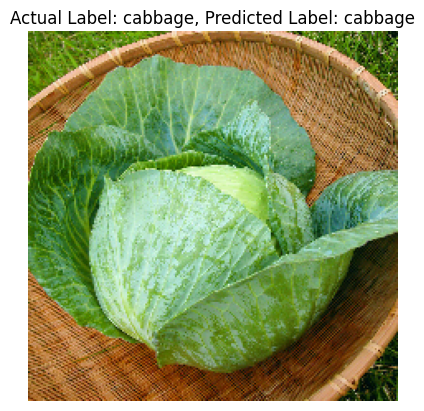

In [45]:
random_index = np.random.randint(len(x_test))

random_image = x_test[random_index]
actual_label = np.argmax(y_test_one_hot[random_index])

print(actual_label)

random_image = np.expand_dims(random_image, axis=0)

predicted_label = model.predict(random_image)

predicted_label = np.argmax(predicted_label)

print(predicted_label)

class_names = test.class_names

plt.imshow(random_image.squeeze())
plt.title(f"Actual Label: {class_names[actual_label]}, Predicted Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

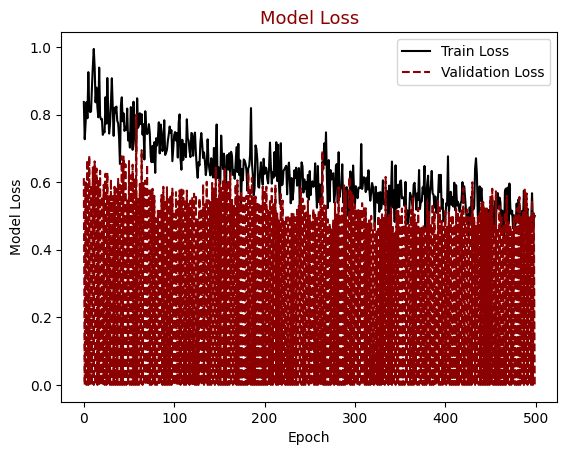

In [33]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.xlabel("Epoch")
plt.ylabel("Model Loss")
plt.legend()
plt.savefig("/mnt/d/BDA602/model_loss_plot_DenseNet121.png")
plt.show()

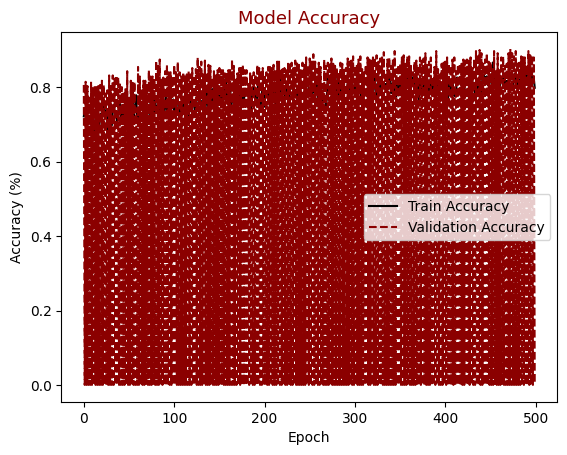

In [34]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy", color="black")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", color="darkred", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
plt.title("Model Accuracy", color="darkred", size=13)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.savefig("/mnt/d/BDA602/model_accuracy_plot_DenseNet121.png")
plt.show()

In [36]:
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc * 100, '%')

Found 359 images belonging to 36 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 750ms/step - accuracy: 0.8618 - loss: 0.7940
Test accuracy: 90.52924513816833 %
